# Clustering with [Python](https://www.python.org/) &nbsp;<a href="https://www.python.org/"><img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png" style="max-width: 35px; display: inline" alt="Python"/></a>


_Large multi-spectral image segmentation: Representing the geological diversity of the surface of Mars_

---

The objective of this tutorial is to use in practice the different concepts studied during the course on clustering. Image segmentation is a standard problem where unsupervised classification is used. Here, we want to apply clustering to the pixels of a multi-spectral image representing the surface of Mars. The goal is to identify different "types" of pixels corresponding to different geological compositions, thus generating a geological map of Mars.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 10

--- 

## Objective and Data exploration

**Data**: The data in the `mars.csv` file represent a hyper-spectral image of the surface of Mars. Visible and near-infrared imagery is a key tele-detection technique, used to study planets thanks to satellites with on-board spectrometers. In march 2014, the OMEGA equipment collected more than 310 Go of raw images. It mapped Mars surface with a resolution between 300 and 3000 meters, depending on the height of the space ship ([Bibring et al., 2005](https://pubmed.ncbi.nlm.nih.gov/15718430/)). For each pixel, the spectral response between 0.36 and 5.2 μm was collected and sampled accross 255 channels. The objective is to characterize the geological composition of Mars surface and in particular to distinguish between different classes of silicates, minerals, oxydes, carbonates and frozen regions.

These data are represented by an image of 300 x 128 pixels.

In [2]:
mars = pd.read_csv("data/mars.csv.zip")

mars.describe()
mars
##

V1        V2        V3        V4        V5        V6        V7  \
0      0.244973  0.350886  0.348441  0.363784  0.358491  0.363753  0.374347   
1      0.163648  0.307574  0.344063  0.360967  0.359314  0.364588  0.372576   
2      0.246103  0.297238  0.355239  0.358141  0.362652  0.365431  0.365535   
3      0.287628  0.308790  0.340226  0.366061  0.355713  0.356833  0.366133   
4      0.247076  0.320599  0.341013  0.352210  0.356535  0.355356  0.364336   
...         ...       ...       ...       ...       ...       ...       ...   
38395  0.193134  0.274303  0.280883  0.282799  0.281096  0.282927  0.286683   
38396  0.193383  0.289575  0.274234  0.283163  0.284851  0.284846  0.292401   
38397  0.193667  0.282529  0.267620  0.278625  0.285269  0.282153  0.285690   
38398  0.193917  0.267937  0.271478  0.276505  0.278835  0.280958  0.282487   
38399  0.249756  0.275822  0.282439  0.281882  0.280951  0.284495  0.286483   

             V8        V9       V10  ...      V246      V247      V248  \
0      0.363450  0.365693  0.359439  ...  0.382391  0.451095  0.444223   
1      0.368330  0.366532  0.363055  ...  0.426349  0.422770  0.460147   
2      0.377298  0.360611  0.361098  ...  0.412942  0.453176  0.446272   
3      0.357601  0.357813  0.360288  ...  0.370367  0.409704  0.461966   
4      0.370642  0.358640  0.355510  ...  0.385674  0.440195  0.478032   
...         ...       ...       ...  ...       ...       ...       ...   
38395  0.289296  0.280190  0.281546  ...  0.377218  0.363897  0.374951   
38396  0.289668  0.279404  0.284753  ...  0.358318  0.374275  0.365374   
38397  0.295585  0.280963  0.276631  ...  0.368551  0.384748  0.345760   
38398  0.284973  0.275583  0.278888  ...  0.369028  0.375309  0.315942   
38399  0.288147  0.277141  0.281203  ...  0.359840  0.385816  0.387132   

           V249      V250      V251      V252      V253      V254      V255  
0      0.384423  0.444853  0.463225  0.428826  0.470096  0.428914  0.463361  
1      0.415957  0.461742  0.464288  0.395610  0.382859  0.485595  0.483626  
2      0.447642  0.431001  0.481777  0.396525  0.419152  0.468110  0.484745  
3      0.371442  0.479499  0.466124  0.414342  0.437571  0.524793  0.466260  
4      0.403145  0.416736  0.483681  0.449715  0.403035  0.488642  0.448016  
...         ...       ...       ...       ...       ...       ...       ...  
38395  0.379854  0.367617  0.410975  0.380546  0.405206  0.457212  0.437508  
38396  0.359654  0.357379  0.378343  0.392579  0.393805  0.382610  0.451033  
38397  0.401622  0.390084  0.389968  0.404715  0.418264  0.420823  0.451696  
38398  0.381394  0.412070  0.401557  0.382089  0.394893  0.433933  0.413288  
38399  0.392348  0.401923  0.424353  0.359472  0.431398  0.409405  0.439932  

[38400 rows x 255 columns]

##### <span style="color:purple">**Question:** How many spectral values are observed for each pixel?</span>

We can start by checking that the images are indeed composed of 300 x 128 pixels.

<!-- 255 spectral values -->

In [3]:
### TO BE COMPLETED ### 

mars_data = mars.to_numpy()

# Dimensions de l'image
n_pixel_x = 300
n_pixel_y = 128

n_pixel = mars.shape[0]
dim_spectral = mars.shape[1]

print("Image size: n_x.n_y:", n_pixel_x*n_pixel_y)
print("Number of pixels   :", n_pixel)
print("Number of channels :", dim_spectral)

##en chaque petit carré on observe 255longueurs d'onde

Image size: n_x.n_y: 38400
Number of pixels   : 38400
Number of channels : 255


In [4]:
# %load solutions/data/nb_pixels.py
mars_data = mars.to_numpy()

# Dimensions de l'image
n_pixel_x = 300
n_pixel_y = 128

n_pixel = mars.shape[0]
dim_spectral = mars.shape[1]

print("Image size: n_x.n_y:", n_pixel_x*n_pixel_y)
print("Number of pixels   :", n_pixel)
print("Number of channels :", dim_spectral)

Image size: n_x.n_y: 38400
Number of pixels   : 38400
Number of channels : 255


##### <span style="color:purple">**Todo:** Represent the spectral response as a map on the image of Mars.</span>

To answer this question :
* Randomly select 6 wavelengths,
* Visualize the spectral response as an image. You can use the `imshow` function for this purpose.

In [5]:
### TO BE COMPLETED ### 

val=np.random.randint(0,high=255, size=6, dtype=int)
extrait=np.zeros((38400,6))
index=0  

for i in range(6) :
    extrait[:,i]=mars_data[:,val[i]]
    

#for i in range(6):
#    plt.subplot(2, 3, i+1)
 #   plt.imshow(extrait[:,i])


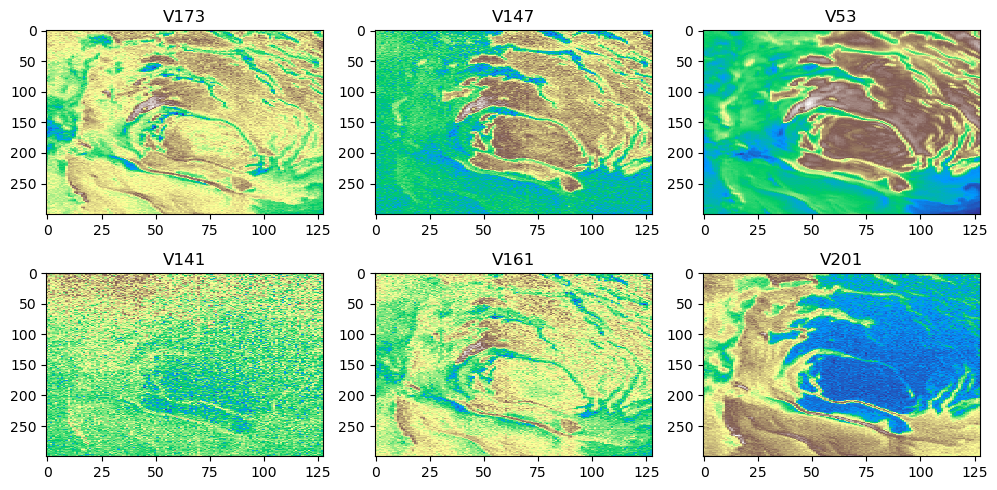

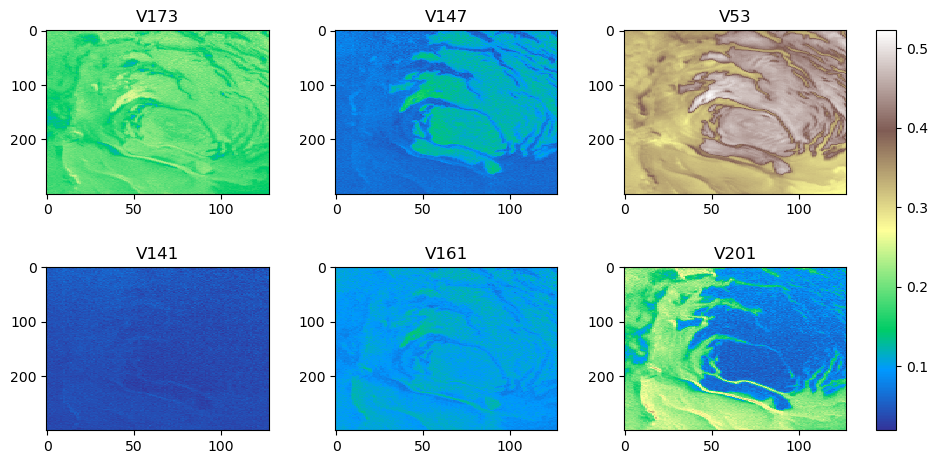

In [6]:
# %load solutions/data/spectral_response.py
plotIndex = np.random.randint(0, 255, 6)

plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    mars_image = mars_data[:,plotIndex[i]].reshape((n_pixel_x, n_pixel_y))
    plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap='terrain')
    plt.title("V%i" % (plotIndex[i]+1))
    
plt.tight_layout()
plt.show()

# --- #
# Same colorbar for all graphics

fig = plt.figure()
vmin = mars_data[:,plotIndex].min()
vmax = mars_data[:,plotIndex].max()

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    mars_image = mars_data[:,plotIndex[i]].reshape((n_pixel_x, n_pixel_y))
    img = plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap='terrain')
    plt.title("V%i" % (plotIndex[i]+1))
    img.set_clim(vmin,vmax)
    
fig.subplots_adjust(bottom=0.1, top=.9, left=0, right=0.8,
                    wspace=0.3, hspace=0.45)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
fig.colorbar(img, cax=cb_ax)
    
plt.show()

# on a 255 images qui representent le meme pixel
#si on analyse V9 (dans ce run) on observe 2 tendances différentes en marron l'intensité est la plus forte (voir barre colorimétrie)
#image V207 on observve majoritaire du bruit car image grisée
#il faut faire le lien avec les histogrammes

### Exploration of the wave length distributions

252##### <span style="color:purple">**Question:** How are the spectral values distributed?</span>

To answer this question :
* For the same 6 variables as those selected previously, plot the histrogram of the distribution of these spectral values.
* We can focus on the symmetry, dispersion and possible multimodal nature of the variables. 

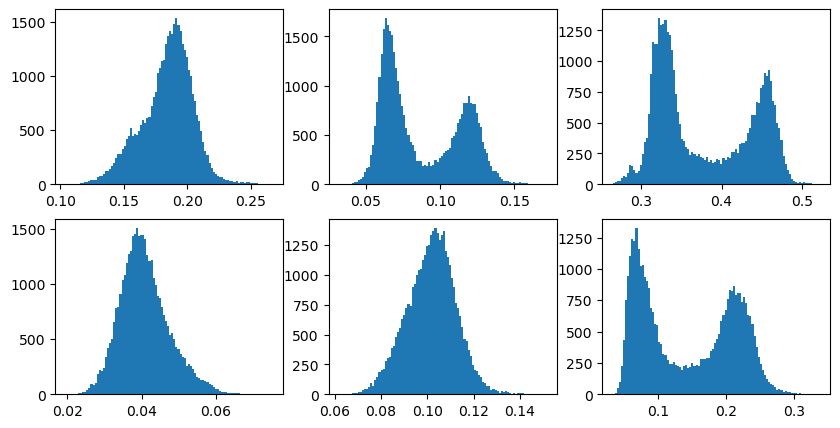

In [7]:
### TO BE COMPLETED ### 

fig, axs = plt.subplots(2,3)

for i in range(6):
    plt.subplot(2, 3, i+1)
    mars_image = mars_data[:,plotIndex[i]]
    plt.hist(mars_image, bins=100)
    
#si on met en correspondance image et hist : zone grisée = 1 pic avec la majorité des valeurs à 0 
#si on distingue deux tendances différentes dans images alors l'histogramme correspondant aura 2 pics 


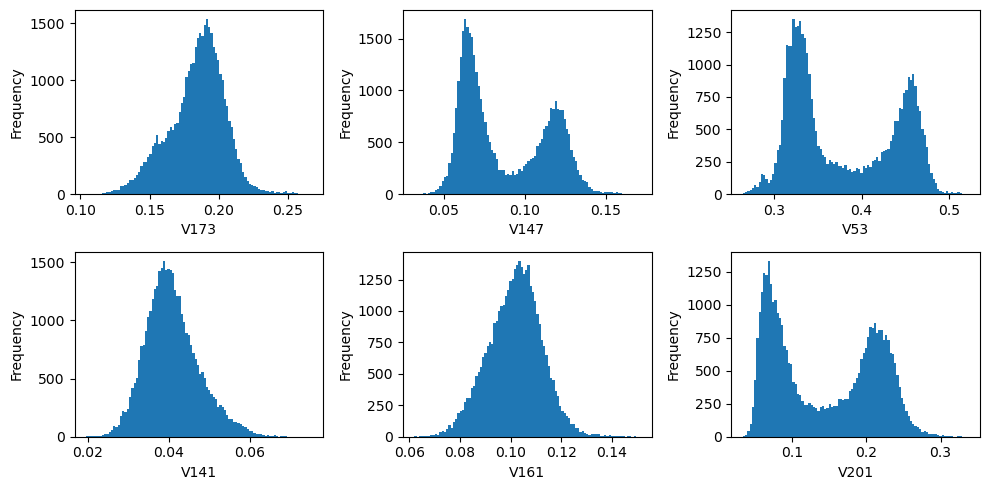

In [8]:
# %load solutions/data/spectral_distrib.py
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(mars_data[:, plotIndex[i]], bins = 100)
    plt.xlabel("V%i" % (plotIndex[i]+1))
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### <span style="color:purple">**Question:** Does standardizing this data make sense?</span>

To answer this question:
* Represent the boxplots of all wave lengths.
* Compare the range of the data, their median, the presence of outliers.

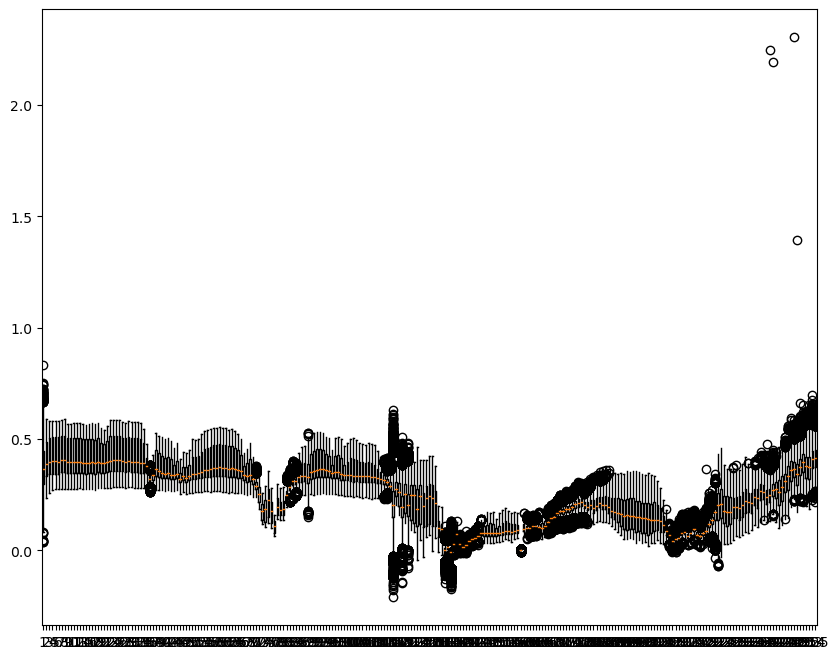

In [9]:
### TO BE COMPLETED ### 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
axs=plt.boxplot(mars_data)



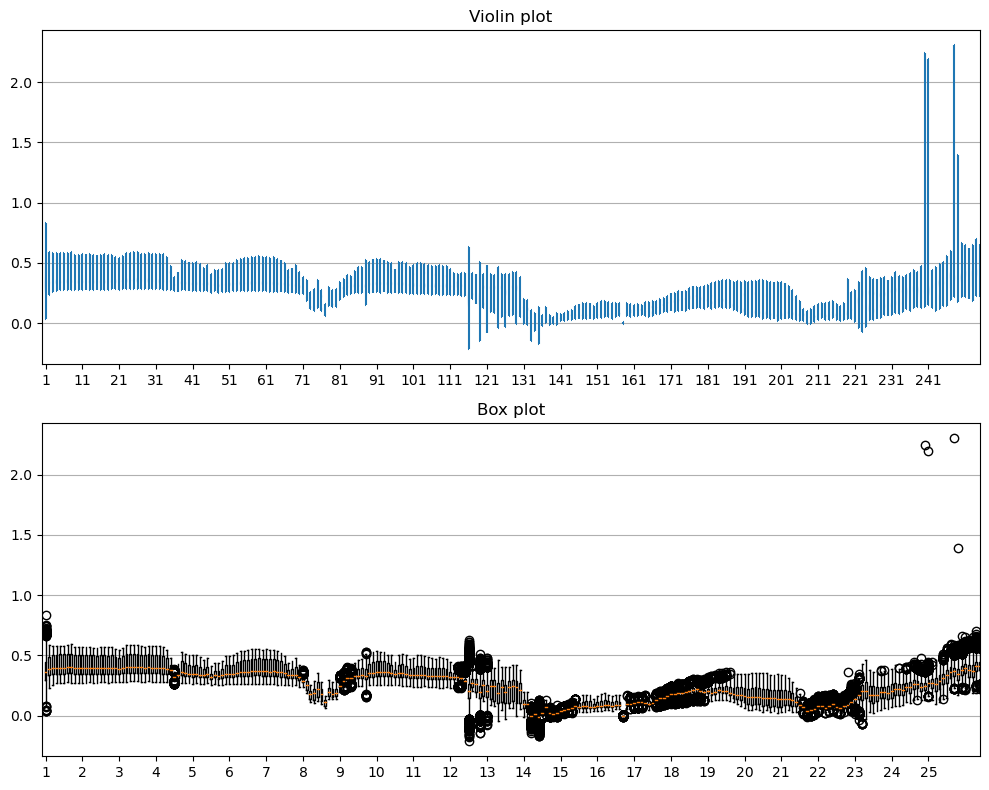

In [10]:
# %load solutions/data/data_bp.py
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# violin plot
axs[0].violinplot(mars_data, showmeans=False, showmedians=True)
axs[0].set_title('Violin plot')

# box plot
axs[1].boxplot(mars_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xlim(0,dim_spectral)
    #ax.set_xticks([])
    ax.set_xticks([10*y+1 for y in range(dim_spectral//10)])

plt.tight_layout()
plt.show()

##### <span style="color:purple">**Todo:** Plot the spectra of a subsample of pixels.</span>

Text(0, 0.5, 'Measured value')

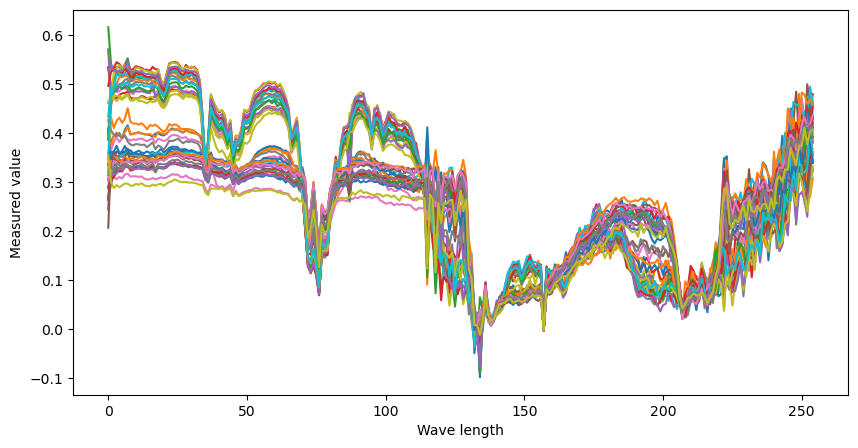

In [11]:
### TO BE COMPLETED ### 
pixel_extrait=mars_data[::1000]
#on divise notre echantillon en 1000 (en prenant pas de 1000) donc il y aura 38 pixels (38400/1000)


for i in range (pixel_extrait.shape[0]) :
    plt.plot(pixel_extrait[i,:])

plt.xlabel("Wave length")
plt.ylabel("Measured value")

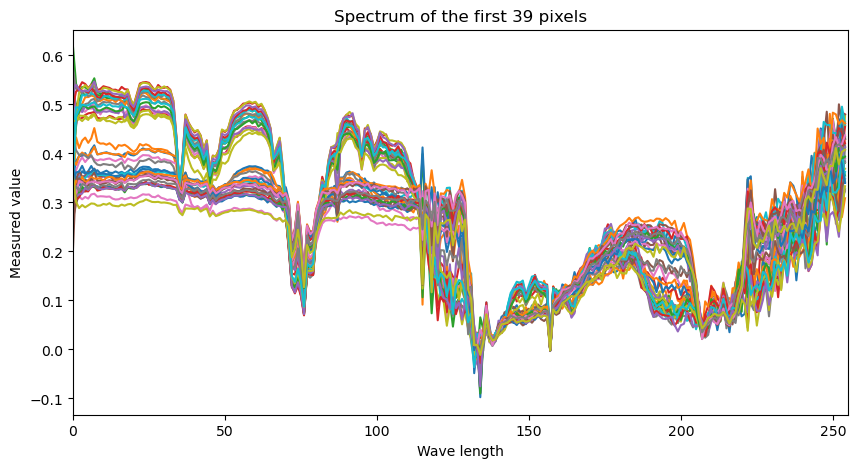

In [12]:
# %load solutions/data/spectra.py
sample = mars_data[::1000]
x = np.arange(0, 255)

for i in range(sample.shape[0]):
    plt.plot(x, sample[i, :])
     
plt.title("Spectrum of the first %i pixels" % sample.shape[0])
plt.xlabel("Wave length")
plt.ylabel("Measured value")
plt.xlim(0,dim_spectral)
plt.show()

### Data standardization

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
mars_scaled = ss.fit_transform(mars_data)

##### <span style="color:purple">**Todo:** Verify the effect of standardization.</span>

1. For the same 6 variables as those selected previously, draw the histrograms of their standardized counterparts, and compare with the raw observations.
2. Represent the boxplots of all wave lengths.

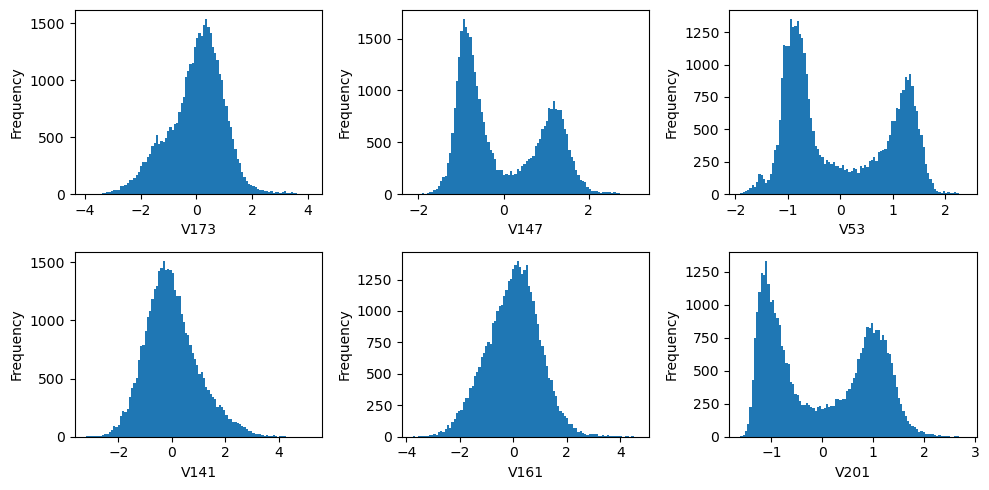

In [14]:
### TO BE COMPLETED ##
# Visualization of different wave length distributions after standard scaling

plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    mars_image = mars_scaled[:,plotIndex[i]].reshape((n_pixel_x, n_pixel_y))
    plt.hist(mars_scaled[:, plotIndex[i]], bins = 100)
    plt.xlabel("V%i" % (plotIndex[i]+1))
    plt.ylabel("Frequency")


plt.tight_layout()
plt.show()

In [15]:
# %load solutions/data/scaled_spectral_distrib.py

In [16]:
### TO BE COMPLETED ##
# Visualization of different wave length distributions after standard scaling

[...]

[Ellipsis]

In [17]:
# %load solutions/data/compare_spectral_distrib.py

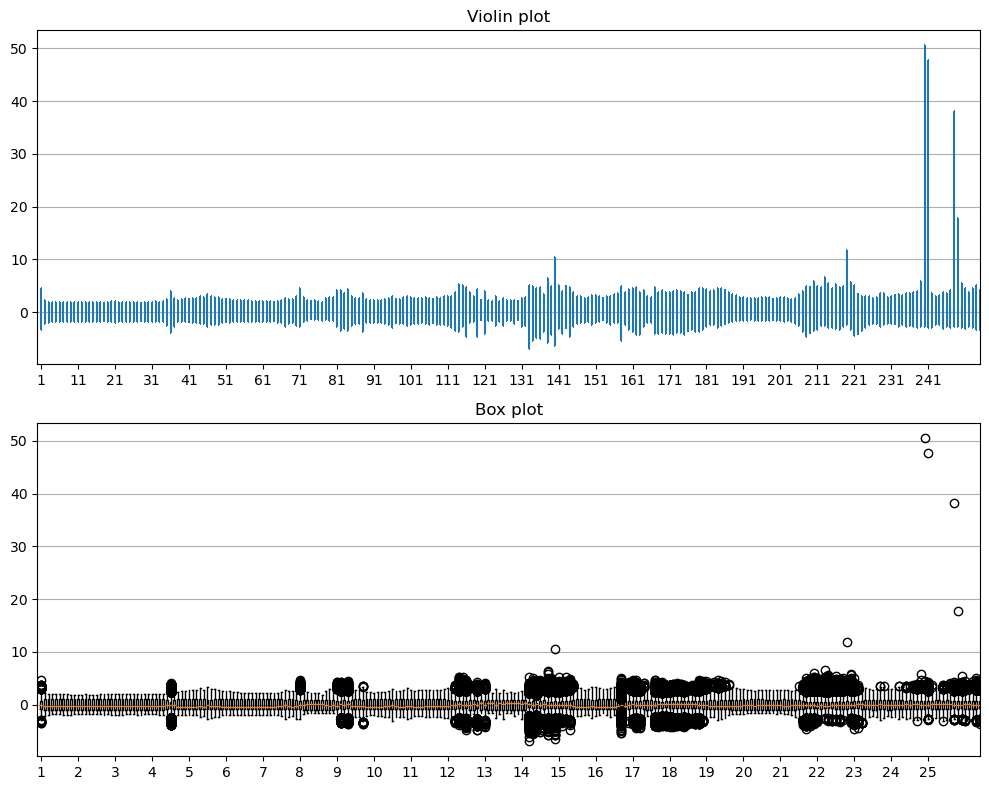

<Figure size 1000x500 with 0 Axes>

In [18]:
### TO BE COMPLETED ##
# Box plots of all scaled variables

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# violin plot
axs[0].violinplot(mars_scaled, showmeans=False, showmedians=True)
axs[0].set_title('Violin plot')

# box plot
axs[1].boxplot(mars_scaled)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xlim(0,dim_spectral)
    #ax.set_xticks([])
    ax.set_xticks([10*y+1 for y in range(dim_spectral//10)])

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [19]:
# %load solutions/data/scaled_bp.py

### Dimension reduction by Principal Component Analysis (PCA)

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
mars_pca = pca.fit_transform(mars_scaled)

##### <span style="color:purple">**Question:** How many components on the PCA should we keep?</span>

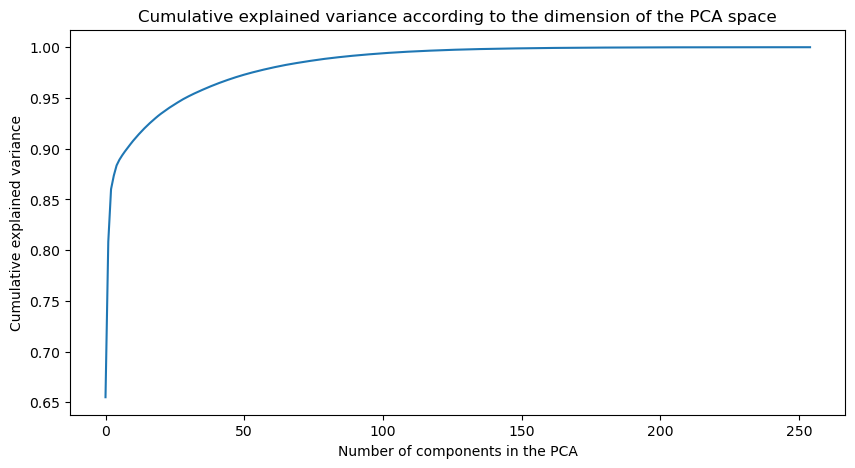

In [21]:
### TO BE COMPLETED ##

# --- #

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');

In [22]:
pca1 = PCA(0.9).fit(mars_pca)
pca1.n_components_

#Pour expliquer 90% de la variance, on doit garder 9 composantes

9

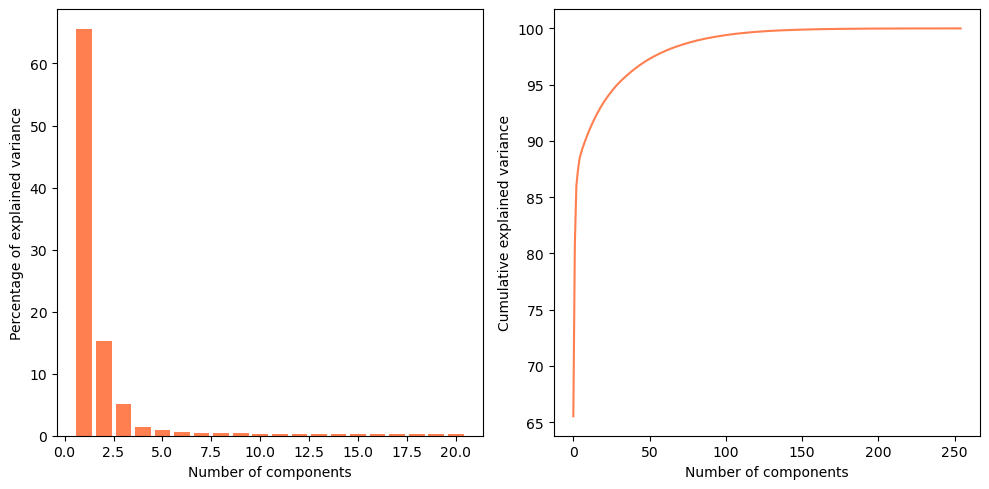

Variance explained by the first 3 components: 86.01


In [23]:
# %load solutions/pca/pca_components.py
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 20
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

plt.tight_layout()
plt.show()

print("Variance explained by the first 3 components:", round(sum([explained_variance_ratio[i] for i in range(3)]),2))

##### <span style="color:purple">**Todo:** Visualize the dispersion of the observations on the 10-th first components of the PCA.</span>

<span style="color:gray">[Indication]</span> 
<!-- Display the boxplot of the 10-th first components of the PCA. -->

In [24]:
### TO BE COMPLETED ##

[...]

[Ellipsis]

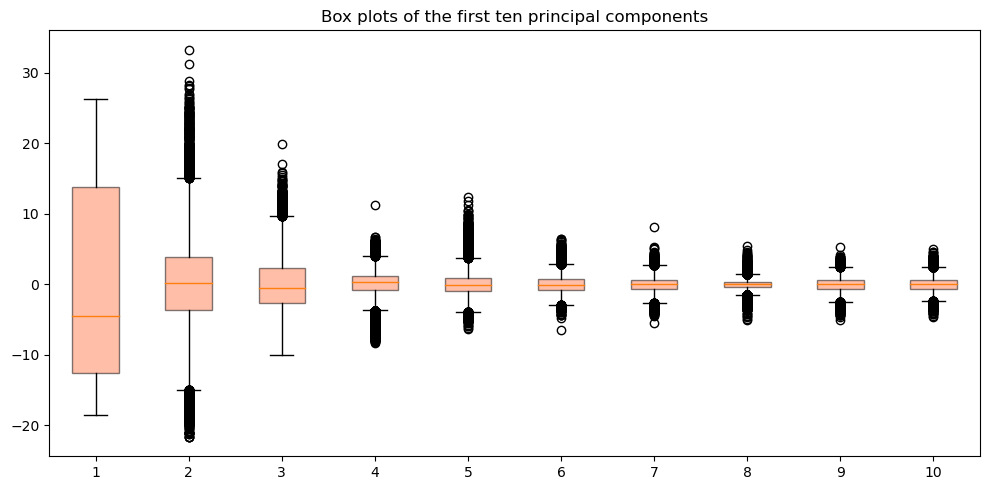

In [25]:
# %load solutions/pca/pca_bp.py
box = plt.boxplot(mars_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

#### Variable factor map


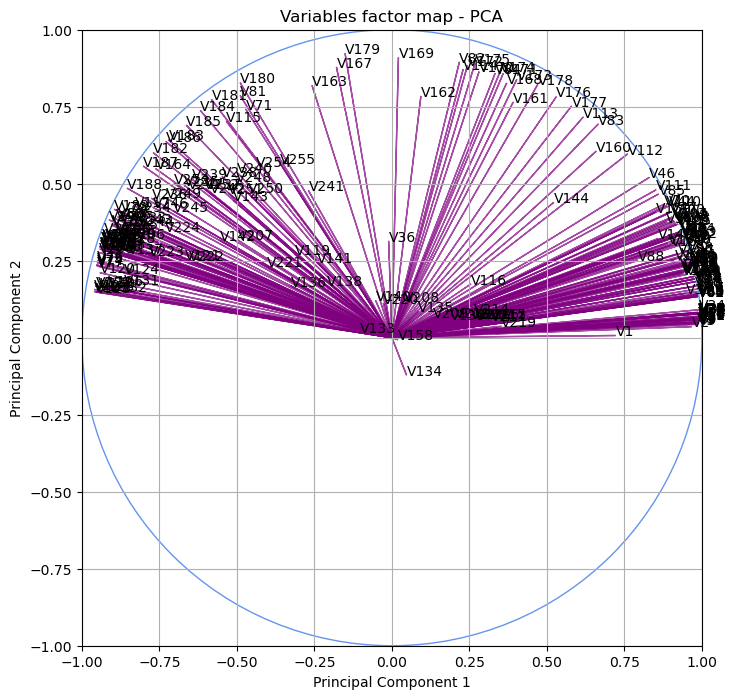

In [26]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, mars.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

## <span style="color:purple">**Todo:** Comment the above figure.</span>
###### on distingue 3 groupes différents : 2 anti_corrélés en dim 1  et un autre groupe avec des valeurs plus dispersées

#### Individual factor maps

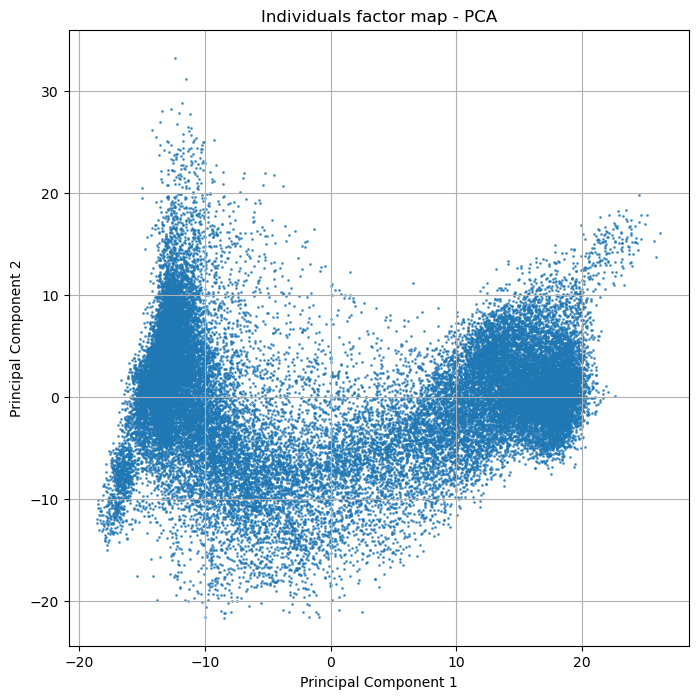

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(mars_pca[:, 0], mars_pca[:, 1], s=1, linewidths=1, alpha=0.7)

plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

##### <span style="color:purple">**Question:** Does a six-class clustering - as suggested by the experts - seem appropriate to you?</span>
#### non cela ne semble pas approprié on voit plutot 3 clusters différents

#### Biplot

The following function is used to obtain the biplot associated with the PCA.

In [28]:
def biplot(scores, coords, labels=None):
    '''
    Inputs:
        scores: coordinates of the projected data
        coord: coordinates of the features, i.e. eigenvectors (PCs)
        labels: the class labels
    '''    
    xs = scores[:,0] # projection on PC1
    ys = scores[:,1] # projection on PC2
    n = coords.shape[0] # number of variables
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(10,8), dpi=100)
    plt.scatter(xs * scalex, ys * scaley, c = labels, s = 1, alpha = .3)
    
    for i in range(n):
        # plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coords[i,0], coords[i,1], color = 'k', alpha = 1, linestyle = '-', linewidth = 2, overhang=0.2)
        if labels is None:
            plt.text(coords[i,0]* 1.15, coords[i,1] * 1.15, "Var$\,$"+str(i+1), color = 'seagreen', ha = 'center', va = 'center')
        else:
            plt.text(coords[i,0]* 1.15, coords[i,1] * 1.15, labels[i], color = 'seagreen', ha = 'center', va = 'center')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)

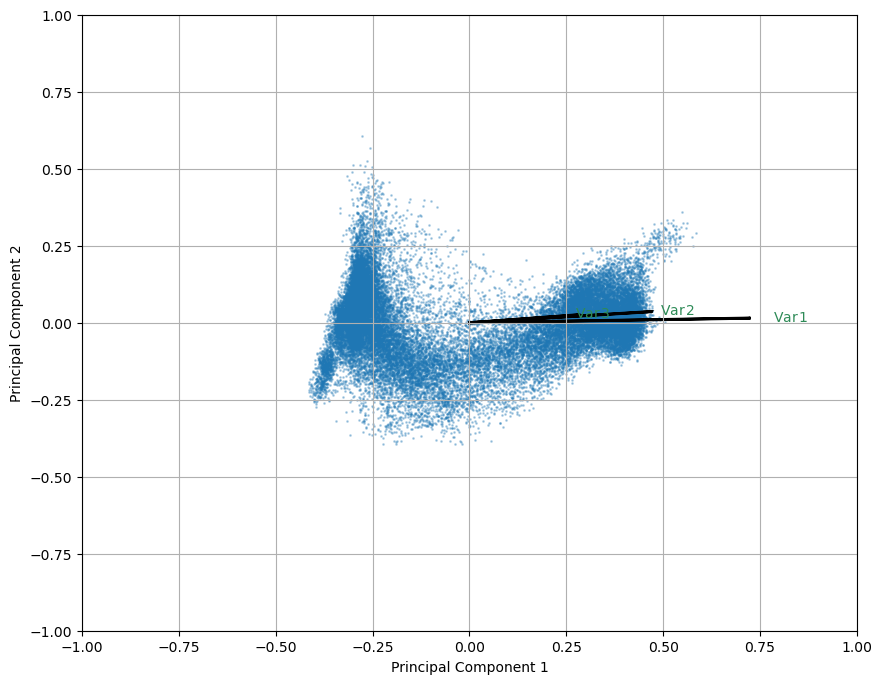

In [29]:
loadings = pca.components_[:2].transpose()
coords = loadings*np.sqrt(pca.explained_variance_).reshape(-1,1)

biplot(mars_pca[:,:2],coords[:3])
plt.show()

#On superpose les deux graphiques : les traits noirs ne sont pas bien normalisés donc pas la bonne longueur

For the end of the tutorial, we will restrict ourselves to the first 3 principal components. 

In [30]:
mars_reduced = mars_pca[:,:3]

## Unsupervised classifications and Image segmentation

The goal of this section is to perform a clustering on the spectral data in order to segment the image: each class found will correspond to a geographical area in the image. In particular, we will color the image according to the classification found from now on.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors



from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Classification by dynamic reallocation: $k$-means

We will compare two strategies: the classification of pixels characterized by the first three components of the PCA, then by the full spectrum.

#### $k$-means on PCA reduced data

**Caution**: The reduction of dimension operated by PCA induces properties that may or may not be interesting. In the present case, restricting oneself to the first three components acts as a denoising or low pass filter because the eigenfunctions associated with the small eigenvalues are particularly noisy. This can be useful in this case but can be detrimental in other circumstances; in particular when class or group separations are to be sought in directions associated with small variances. The choice of the distance between objects, here curves, is in any case fundamental.

The graphs linked to PCA suggest keeping three components, which we will do. It is possible to keep more.

##### <span style="color:purple">**Todo:** Perform a classification by the k-means algorithm while setting the number of classes to 6, as suggested in the literature.</span>

- You may use the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) _scikit-learn_ class;
- Draw a histogram of the obtained classification to see if the classes are globally balanced, or not, with this segmentation. 

In [32]:
KMeans(6)

KMeans(n_clusters=6)

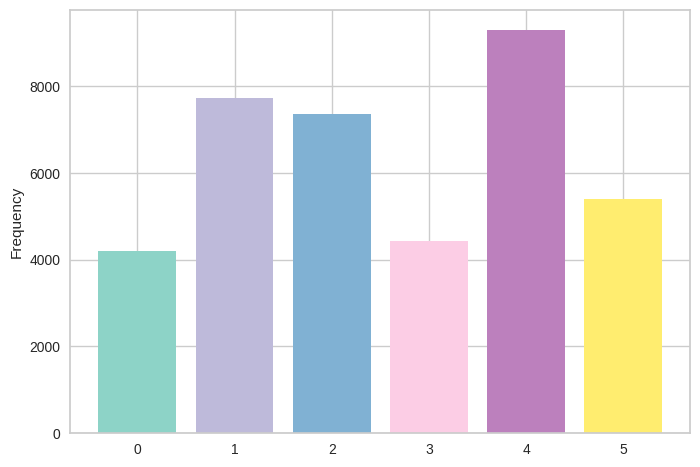

In [33]:
# %load solutions/kmeans/kmeans_hist.py
K = 6

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_pca = kmeans_pca.fit_predict(mars_reduced)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters_pca, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

##### <span style="color:purple">**Todo:** Display the results on individual factor map.</span>

Display the individual factor map with the points colored according to their membership in the class found by $k$-means.

/usr/local/insa/anaconda/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


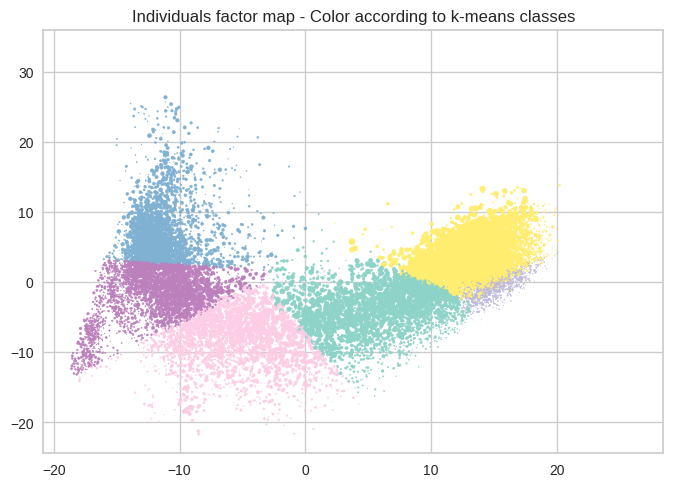

In [34]:
### TO BE COMPLETED ##

plt.scatter(mars_pca[:,0], mars_pca[:,1], mars_pca[:,2], c=clusters_pca, cmap=cmap)
plt.title("Individuals factor map - Color according to k-means classes")

plt.show()

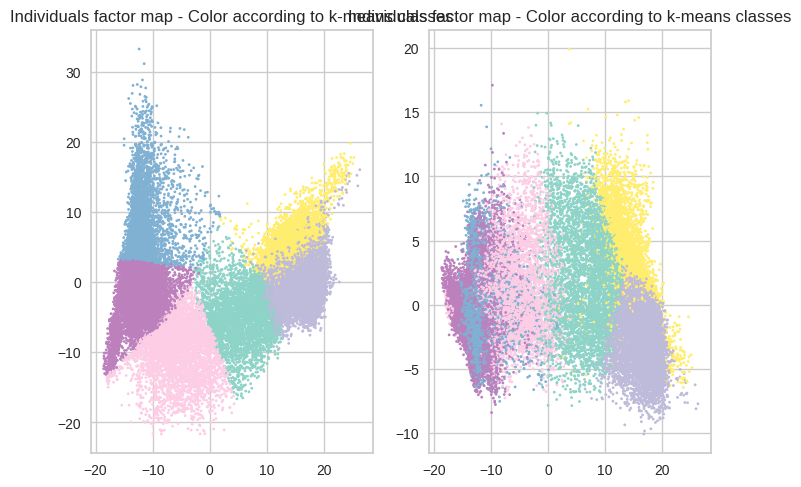

In [35]:
# %load solutions/kmeans/kmeans_acp.py
plt.subplot(1,2,1)
plt.scatter(mars_pca[:,0], mars_pca[:,1], c=clusters_pca, s=1, linewidths=1, cmap=cmap)
plt.title("Individuals factor map - Color according to k-means classes")

plt.subplot(1,2,2)
plt.scatter(mars_pca[:,0], mars_pca[:,2], c=clusters_pca, s=1, linewidths=1, cmap=cmap)
plt.title("Individuals factor map - Color according to k-means classes")

plt.grid(True)
plt.show()

##### <span style="color:purple">**Todo:** Display the image of MARS geological composition found by clustering.</span>

Represent the Mars image, with the pixels colored according to their membership to the classes found by $k$-means.

In [36]:
### TO BE COMPLETED ##

[...]

[Ellipsis]

In [37]:
print(clusters_pca[:100])

[2 2 2 2 2 2 2 2 2 2 4 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 4 2 2 4 2 2 4 4 4 4 2 2 2 2 4 4 0 0 0 0 0 0 0 0 0 5 5 5 0 0
 0 3 3 4 4 3 3 3 0 0 5 5 5 0 0 5 5 5 5 0 0 0 3 4 3 4]


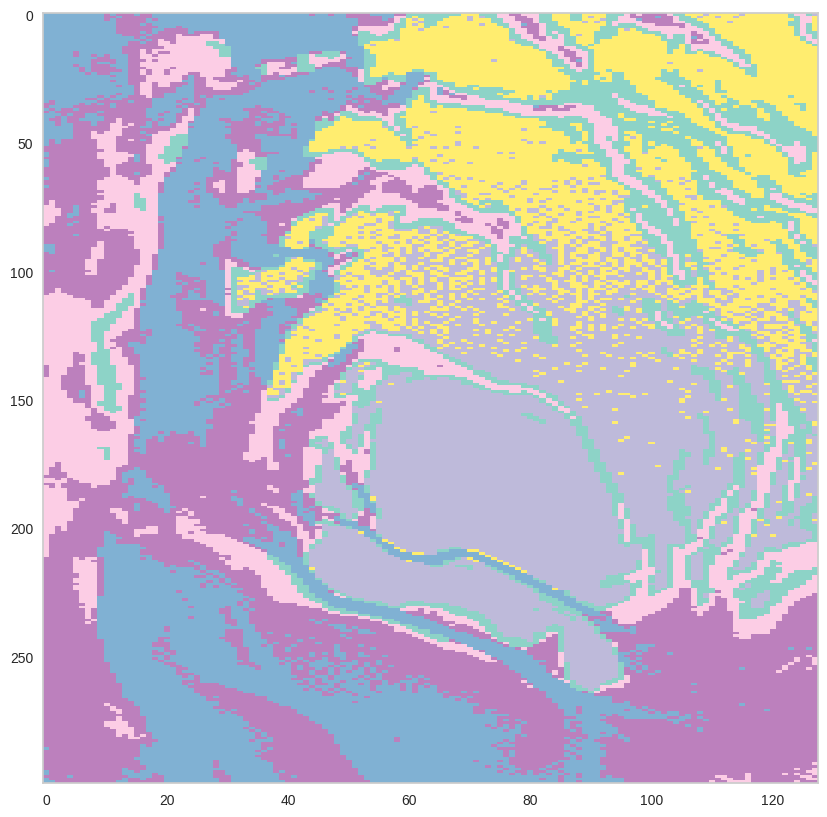

In [38]:
# %load solutions/kmeans/kmeans_img.py
n_pixel_x = 300
n_pixel_y = 128

mars_image = clusters_pca.reshape((n_pixel_x, n_pixel_y))

plt.figure(figsize = (10,10))
plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap=cmap)

plt.grid(False)
plt.show()

#A chacun des pixels on lui associe une classe, et clusters_pca représente un tableau (taille 38400) avec un numéro entre 1 et 6 : numéro de la classe de chaque pixel

##### <span style="color:purple">**Todo:** Display the curve representing the wave lengths of the centroids</span>

For each centroid of the classification, plot its mean spectral value.

In [39]:
### TO BE COMPLETED ##

mars_data[clusters_pca == 1]

array([[0.33567542, 0.45063934, 0.47745267, ..., 0.3060841 , 0.43543214,
        0.37240896],
       [0.51454055, 0.49114233, 0.51665914, ..., 0.26333201, 0.39294067,
        0.46086425],
       [0.59766823, 0.49726984, 0.50979656, ..., 0.35260248, 0.38362688,
        0.36960727],
       ...,
       [0.47991917, 0.48647279, 0.48502037, ..., 0.30429831, 0.34050763,
        0.39465418],
       [0.39567417, 0.44887123, 0.44590956, ..., 0.32913181, 0.31540632,
        0.34226155],
       [0.5355249 , 0.44736379, 0.45884132, ..., 0.35231984, 0.33984432,
        0.35429606]])

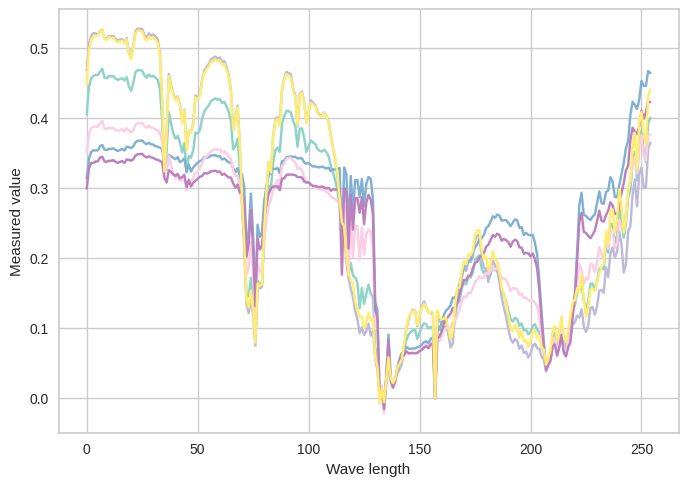

In [40]:
# %load solutions/kmeans/kmeans_centroids.py
K = 6
x = np.arange(0, 255)
for i in range(K):
    plt.plot(x, np.mean(mars_data[clusters_pca == i], axis = 0), color=cmap.colors[i])
    
plt.xlabel("Wave length")
plt.ylabel("Measured value")

plt.show()

#C'est moche : classes jaunes et vertes se différencient : bcp de petites valeurs (>0.5) et au niveau des gdes valeurs : c'est le bordel, les courbes se superposent

#### Selection of the number of clusters

For the moment, based on theoretical knowledge, we have imposed a cluster number of 6. We will now try to find the otpimal number of clusters, without any prior knowledge.

##### <span style="color:purple">**Todo:** Determine the number of clusters using the elbow method.</span>

In [1]:
### TO BE COMPLETED ##

[...]

[Ellipsis]

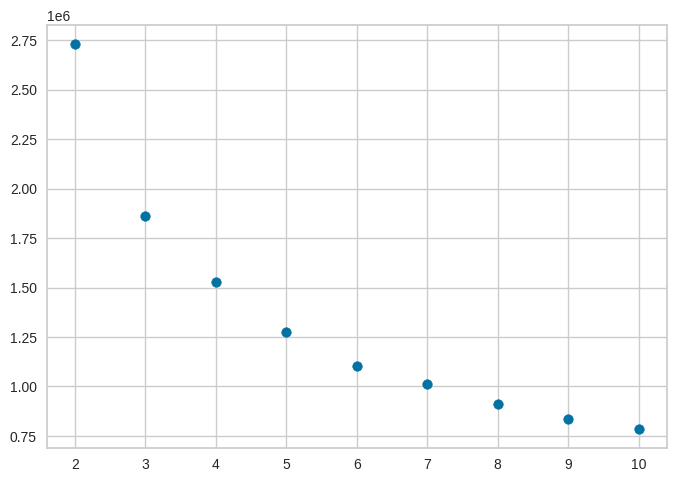

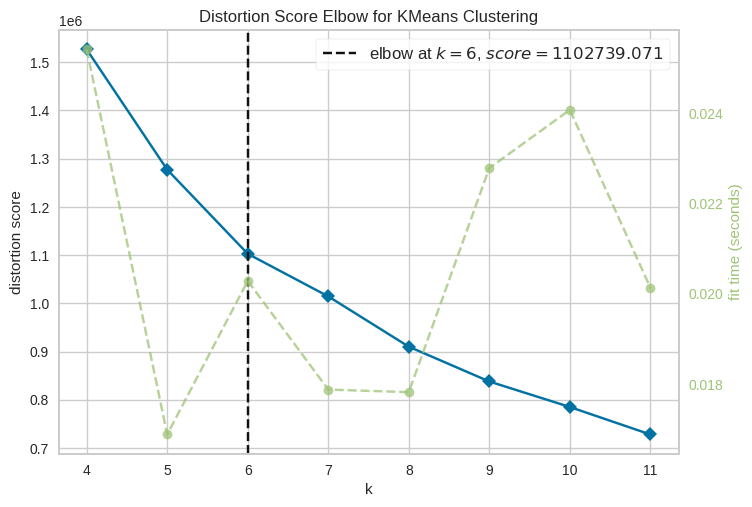

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# %load solutions/kmeans/kmeans_elbow.py
# By hand

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(mars_reduced)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

## plus il y a de classes plus l'inertie est faible car elle correspond à la distance des points de la classe aux centroids
#on cherche ici quand en rajoutant une classe on a un grande baisse d'inertie 
#ici c'est entre 2 et 3

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(mars_reduced)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

##### <span style="color:purple">**Todo:** Determine the number of clusters using the silhouette scores.</span>

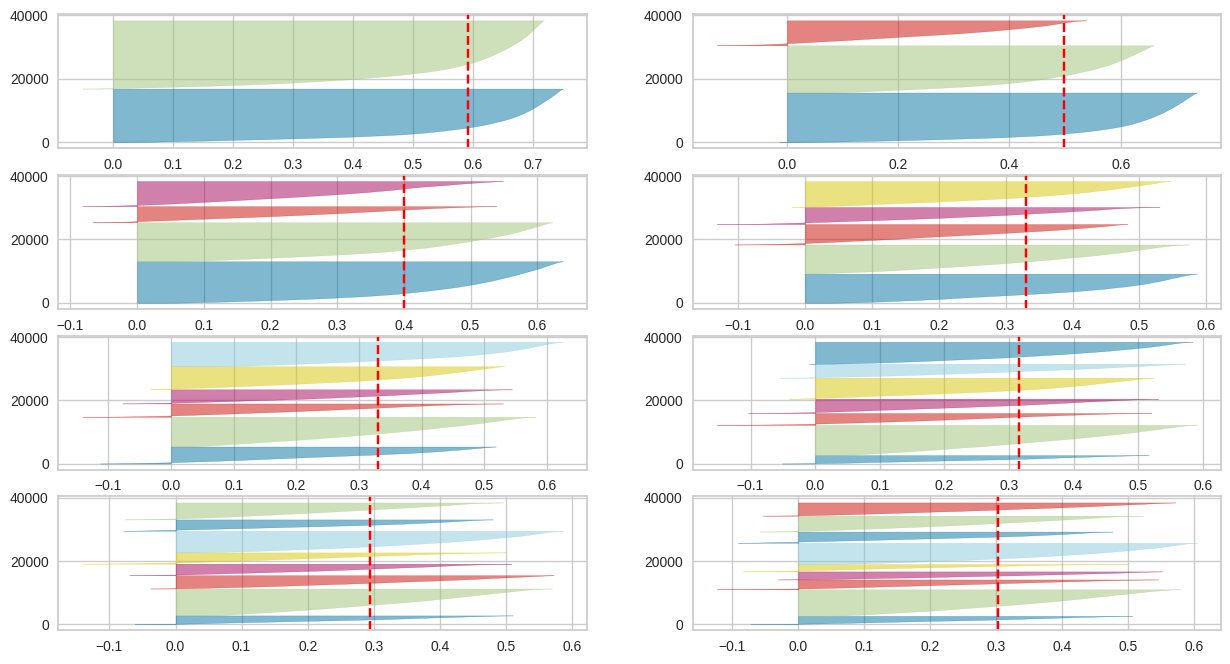

In [60]:
# %load solutions/kmeans/kmeans_silhouette.py
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(mars_reduced)
    
#On regarde combien de clusters on veut : pas bcp de valeurs négatives (données mal classées), largeurs égales et longueur plus grande que le trait rouge 
#On peut garder 2 clusters

##### <span style="color:purple">**Todo:** Represent the geological composition of Mars for 2 classes.</span>

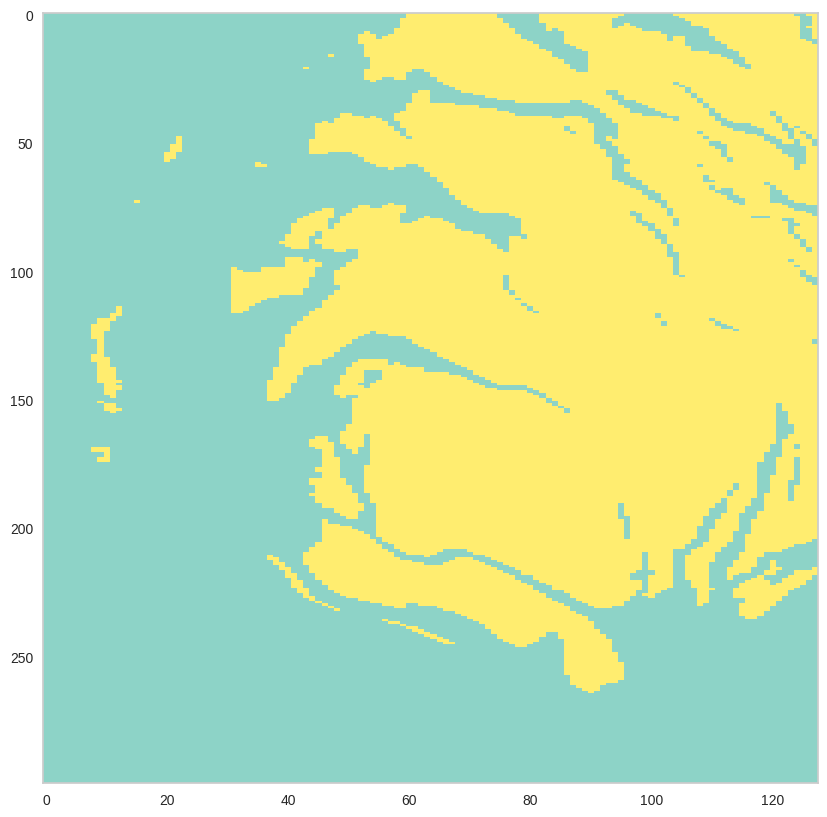

In [62]:
### TO BE COMPLETED ### 

K = 2

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_pca = kmeans_pca.fit_predict(mars_reduced)


n_pixel_x = 300
n_pixel_y = 128

mars_image = clusters_pca.reshape((n_pixel_x, n_pixel_y))

plt.figure(figsize = (10,10))
plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap=cmap)

plt.grid(False)
plt.show()

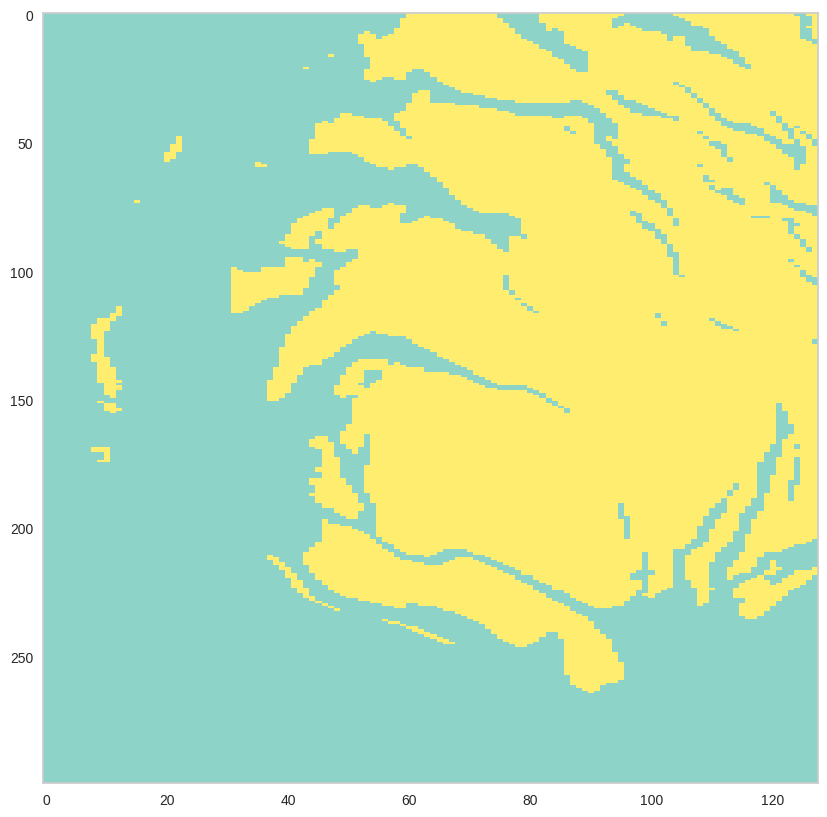

In [64]:
# %load solutions/kmeans/kmeans_2classes.py
K = 2

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto')
clusters_pca = kmeans_pca.fit_predict(mars_reduced)
mars_image = clusters_pca.reshape((n_pixel_x, n_pixel_y))

cmap = plt.get_cmap('Set3',K)
plt.figure(figsize = (10,10))
plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap=cmap)

plt.grid(False)
plt.show()

#### $k$-means on the complete data 

We choose 6 clusters to match the literature. 

##### <span style="color:purple">**Todo:** Represent the geological composition of Mars for six classes, using the complete data.</span>

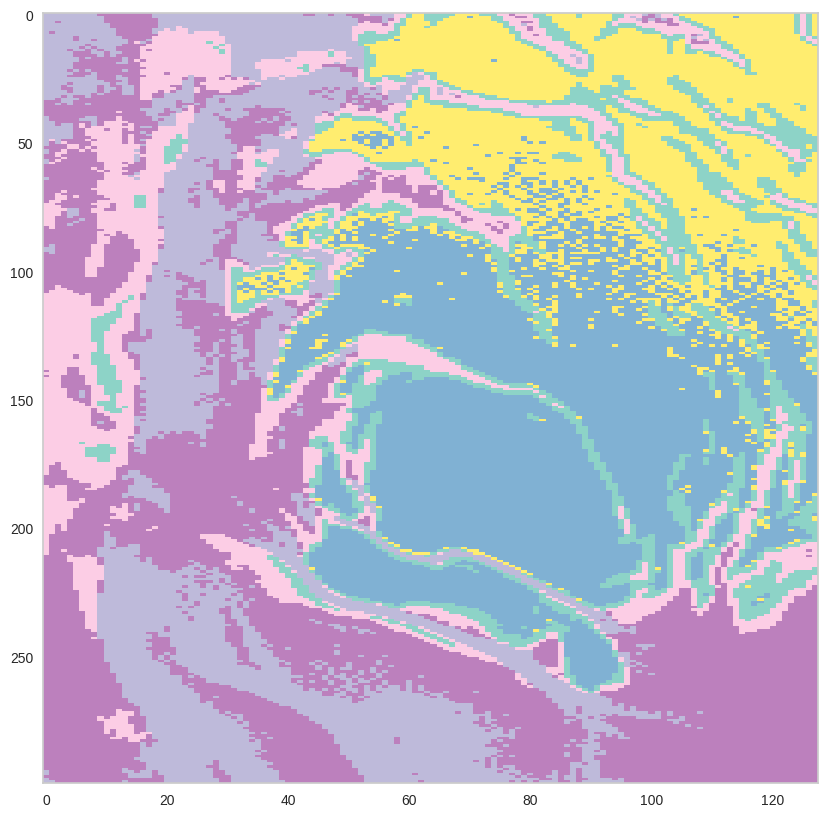

In [69]:
### TO BE COMPLETED ### 

K = 6

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto')
clusters_pca = kmeans_pca.fit_predict(mars_data)


n_pixel_x = 300
n_pixel_y = 128

mars_image = clusters_pca.reshape((n_pixel_x, n_pixel_y))

plt.figure(figsize = (10,10))
plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap=cmap)

plt.grid(False)
plt.show()


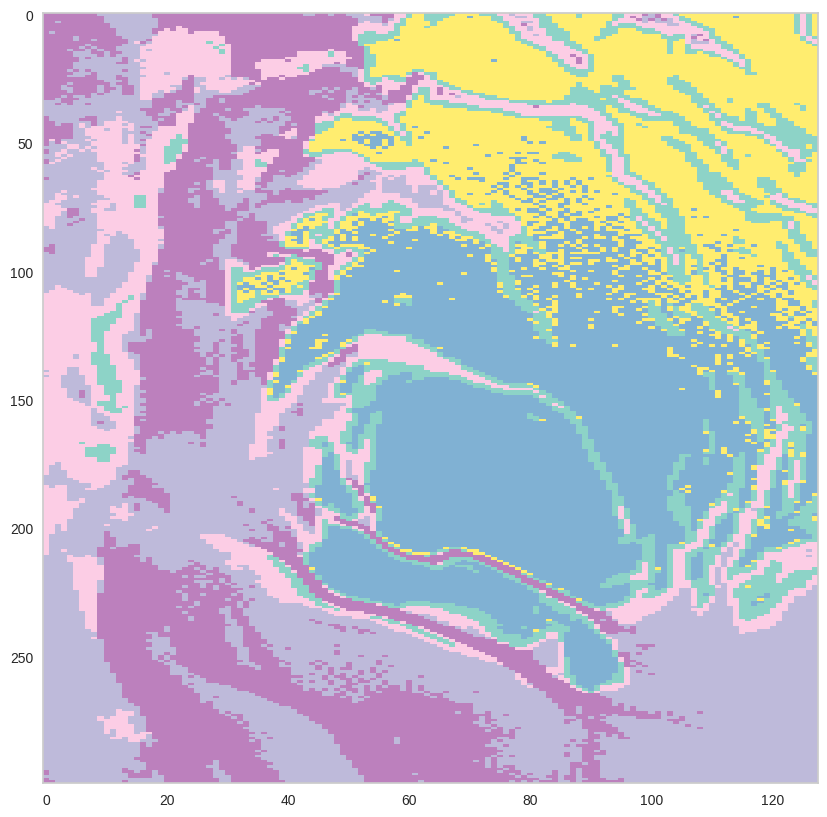

In [68]:
# %load solutions/kmeans/kmeans_complete.py
K = 6

kmeans_full = KMeans(n_clusters=K, init='k-means++', n_init='auto')
clusters_full = kmeans_full.fit_predict(mars_data)
mars_image = clusters_full.reshape((n_pixel_x, n_pixel_y))

cmap = plt.get_cmap('Set3',K)
plt.figure(figsize = (10,10))
plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap=cmap)

plt.grid(False)
plt.show()

### Comparison of the results

##### <span style="color:purple">**Todo:** Visualize side by side the geological image of Mars obtained on the reduced data and on the complete data.</span>

Comment on it.

In [49]:
### TO BE COMPLETED ### 

[...]

[Ellipsis]

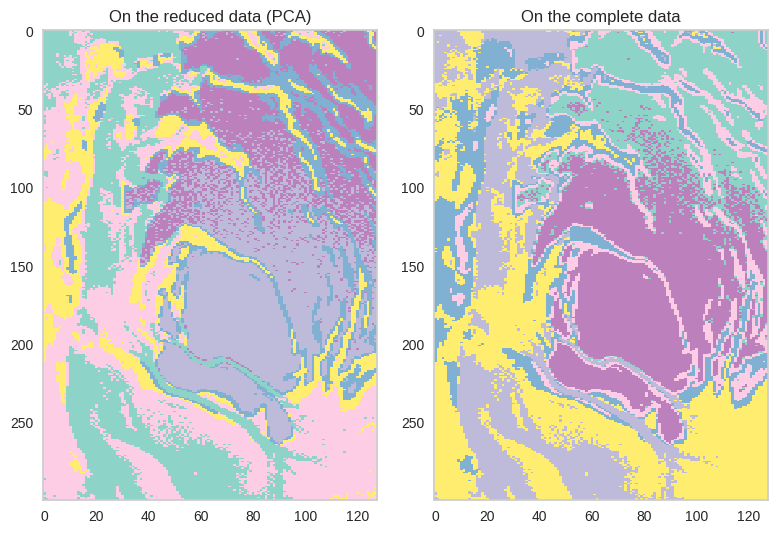

In [71]:
# %load solutions/kmeans/kmeans_compare.py
K = 6
n_pixel_x = 300
n_pixel_y = 128

cmap = plt.get_cmap('Set3', K)

# --- #

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto')
clusters_pca = kmeans_pca.fit_predict(mars_reduced)
mars_image_pca = clusters_pca.reshape((n_pixel_x, n_pixel_y))

kmeans_full = KMeans(n_clusters=K, init='k-means++', n_init='auto')
clusters_full = kmeans_full.fit_predict(mars_data)
mars_image_full = clusters_full.reshape((n_pixel_x, n_pixel_y))

# --- #

plt.subplot(1,2,1)
plt.imshow(mars_image_pca, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("On the reduced data (PCA)")
plt.grid(False)

plt.subplot(1,2,2)
plt.imshow(mars_image_full, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("On the complete data")
plt.grid(False)

plt.tight_layout()
plt.show()

#On a les mm patterns mais les classes sont pas labellisés pareil

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

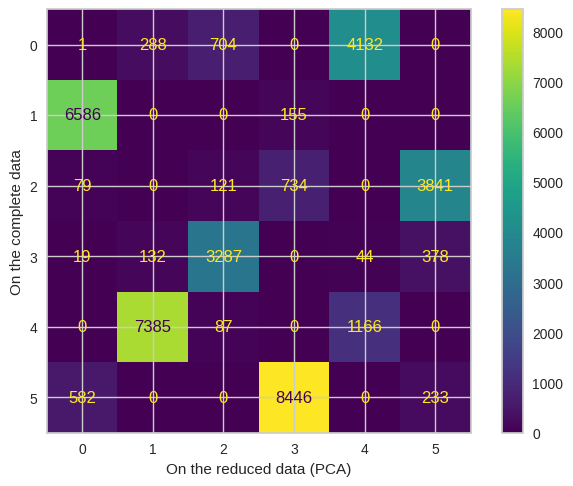

In [73]:
ConfusionMatrixDisplay(confusion_matrix(clusters_full, clusters_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()
#On a pas les mm numéros de cluster

##### <span style="color:purple">**Todo:** Write a function `matchClasses`that reorders the classes found in the two classifications so that they match.</span>

You may start from the confusion matrix of the two classifications and try to place its maximal elements on its diagonal. This function should return the rearranged confusion matrix and the associated class indices for each point of the dataset.

In [ ]:
### TO BE COMPLETED ### 

def matchClasses(classif1, classif2):
    [...]

In [75]:
# %load solutions/kmeans/matchClasses.py
def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters


Classes size: [6586 7385 3287 8446 4132 3841]
Class (in the classif1 numbering): [1 4 3 5 0 2]



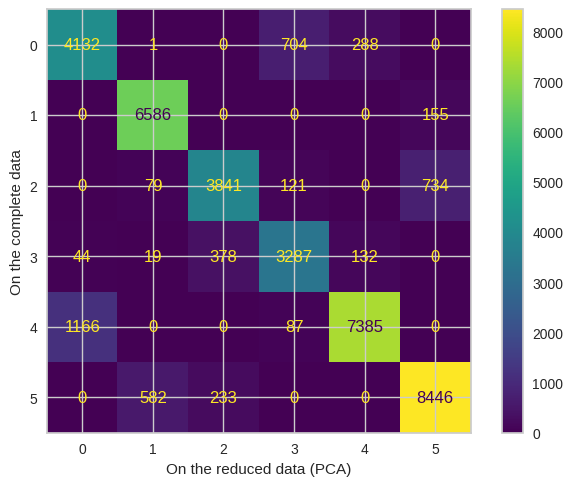

In [77]:
cm, clusters_pca_sorted = matchClasses(clusters_full, clusters_pca)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [82]:
print(clusters_pca[:100])
print(clusters_pca.shape)

[0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 3 0 0 3 3 3 3 0 0 0 0 3 3 2 2 2 2 2 2 2 2 2 4 4 4 2 2
 2 5 5 3 3 5 5 5 2 2 4 4 4 2 2 4 4 4 4 2 2 2 5 3 5 3]
(38400,)


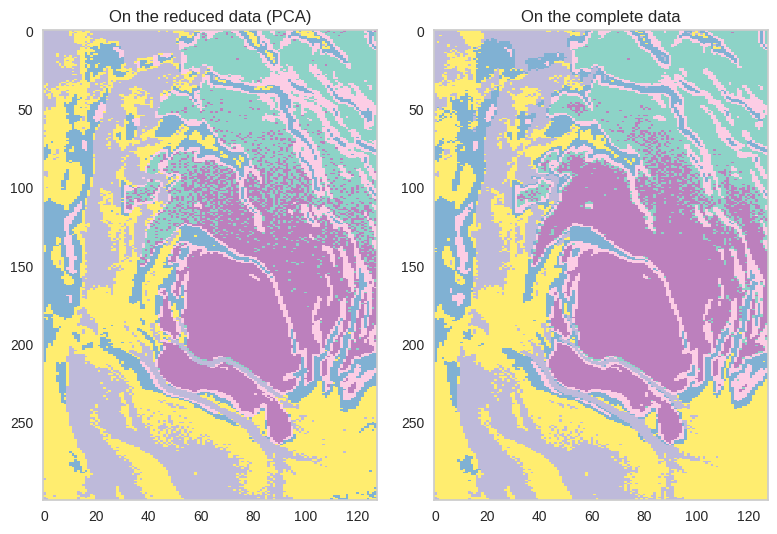

In [78]:
K = 6
n_pixel_x = 300
n_pixel_y = 128

cmap = plt.get_cmap('Set3', K)

# --- #

mars_image_pca_sorted = clusters_pca_sorted.reshape((n_pixel_x, n_pixel_y))
mars_image_full = clusters_full.reshape((n_pixel_x, n_pixel_y))

# -- #

plt.subplot(1,2,1)
plt.imshow(mars_image_pca_sorted, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("On the reduced data (PCA)")
plt.grid(False)

plt.subplot(1,2,2)
plt.imshow(mars_image_full, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("On the complete data")
plt.grid(False)

plt.tight_layout()
plt.show()

**Interpretation**: Now the way the classes are assigned coincides and the coloring between the two images is consistent. 

##### <span style="color:purple">**Todo:** Write a function `diffPlot` to visually compare two classifications.</span>

Write a function that counts the number of points classified differently between two classifications, and displays the image of Mars with these distinct points in black. We will apply it to two classifications whose classes have been previously reordered to match (via the `matchClasses` function for example).

_Remark:_ To create a colormap from a numpy array, we can use the [`colors.ListedColormap`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) function of matplotlib.

In [ ]:
### TO BE COMPLETED ### 

def diffPlot(classif1, classif2):
[...]

In [84]:
# %load solutions/kmeans/diffPlot.py
def diffPlot(classif1, classif2):
    n = classif1.shape[0]
    K = np.max(classif1)+1
    
    clusters = classif1.copy()
    idx = (classif1 != classif2)
    clusters[idx] = K+1
    
    nb_diff = np.sum(idx)
    print("Ratio of differently classified points:", nb_diff/n)   
    print("Nb of pixels differently classified:", nb_diff)

    # make a color map, with points differently classiffied in black
    cmap = plt.get_cmap('Set3',K)
    bk = np.array([0,0,0,1]).reshape(1,-1)
    cmap = colors.ListedColormap( np.concatenate((cmap.colors, bk)) )

    mars_image = clusters.reshape((n_pixel_x, n_pixel_y))
    plt.figure(figsize = (10,10))
    plt.imshow(mars_image, interpolation="nearest", aspect="auto", cmap=cmap)

    plt.grid(False)
    plt.show()

Ratio of differently classified points: 0.12299479166666667
Nb of pixels differently classified: 4723


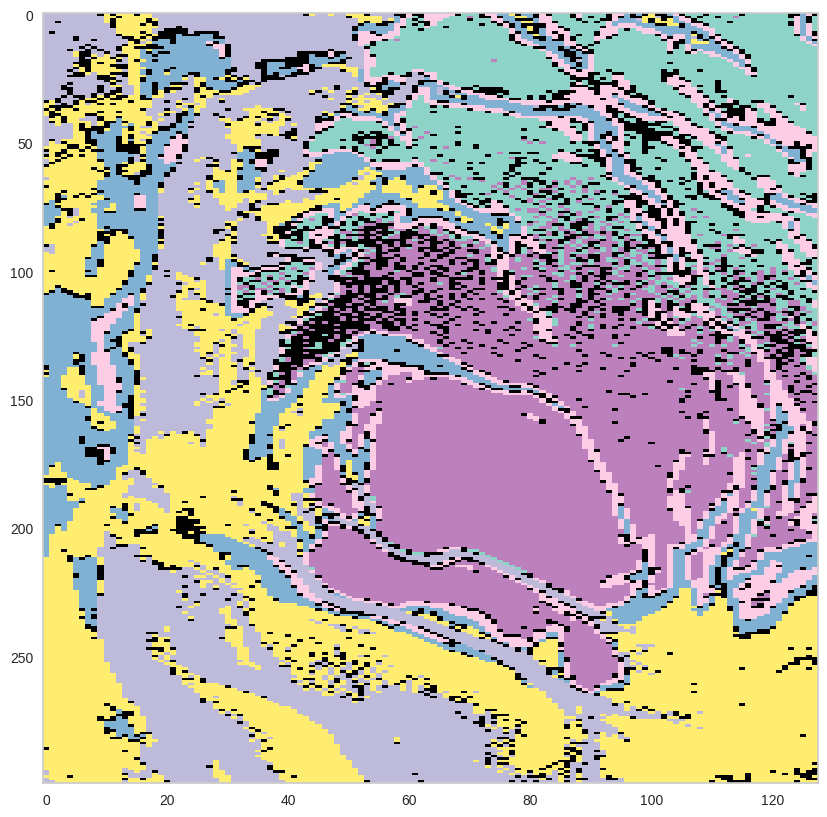

In [85]:
diffPlot(clusters_full, clusters_pca_sorted)

We can also use other scores, such as the mutual information or the Fowlkes-Mallows score.

In [86]:
from sklearn.metrics import normalized_mutual_info_score, fowlkes_mallows_score

In [87]:
similarity_nmi = normalized_mutual_info_score(clusters_full, clusters_pca)
similarity_fm = fowlkes_mallows_score(clusters_full, clusters_pca)

print("Normalized Mutual Information score: %f" % similarity_nmi)
print("Fowlkes Mallows score              : %f" % similarity_fm)

Normalized Mutual Information score: 0.761096
Fowlkes Mallows score              : 0.801124


**Interpretation**: The scores obtained with both external metrics are high, meaning that the classifications obtained are similar with and without PCA.

### Agglomerative Clustering

The $k$-means algorithm leads to satisfactory results. 
We will try to compare it to other classification techniques seen in class. The DBSCAN algorithm is very time consuming and, as its results are not convincing, it has been abandoned. 

In this section, we are interested in the hierarchical ascending classification (CAH). 

In [88]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#### CAH on a sub-sample

The CAH method is much more time consuming than the $k$-means algorithm. Therefore, we will first focus on a sub-sample to allow easier debugging (if needed!).

In [89]:
mars_reduced_samples = mars_reduced[::10]

print("mars data full sample size:", mars_reduced.shape)
print("mars data sub-sample size :", mars_reduced_samples.shape)

mars data full sample size: (38400, 3)
mars data sub-sample size : (3840, 3)


##### <span style="color:purple">**Todo:** Determine the number of clusters using the elbow method.</span>

Special attention will be paid to the first point. In the first instance, a Ward linkage can be used.

In [ ]:
### TO BE COMPLETED ### 

[...]

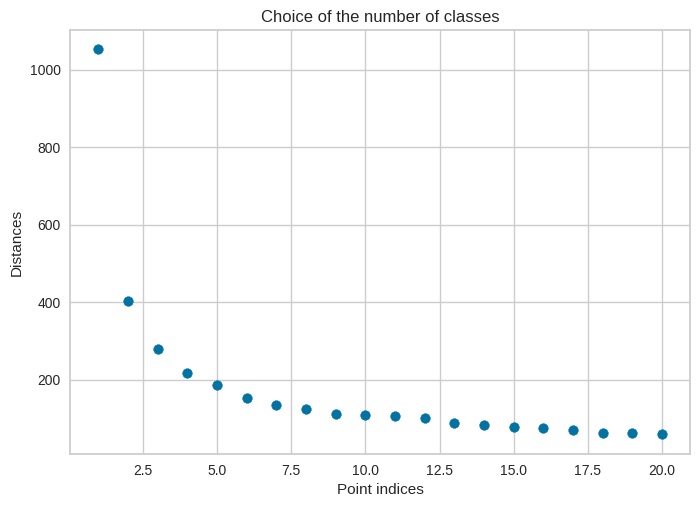

In [91]:
# %load solutions/ac/ac_elbow1.py
ac = AgglomerativeClustering(linkage="ward", compute_distances=True)
clusters_ac = ac.fit_predict(mars_reduced_samples)

distances = ac.distances_

n_sizes = 20
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

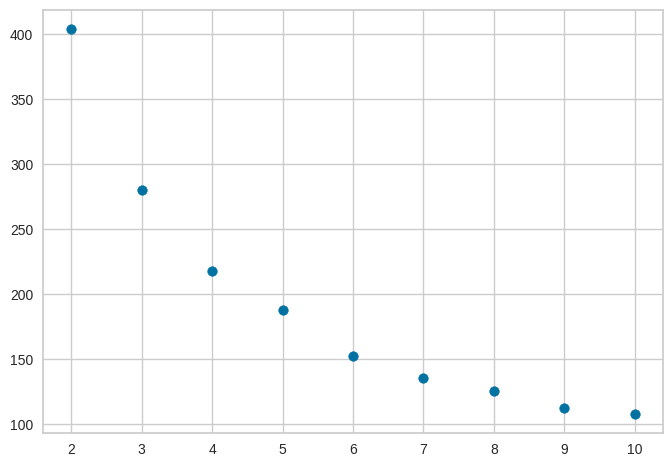

In [93]:
# %load solutions/ac/ac_elbow2.py
# Same plot, but without the first point

n_sizes = 10
x = np.arange(n_sizes, 1, -1)
y = ac.distances_[-n_sizes:-1]

plt.scatter(x, y)
plt.show()
#on observe ici les différences de distances entre deux points consécutifs et la plus grande diff est pour 2 clusters (or ce n'est pas bcp donc cela ne nous va pas)

We could also have used the vizualizer of the `yellowstone` package.

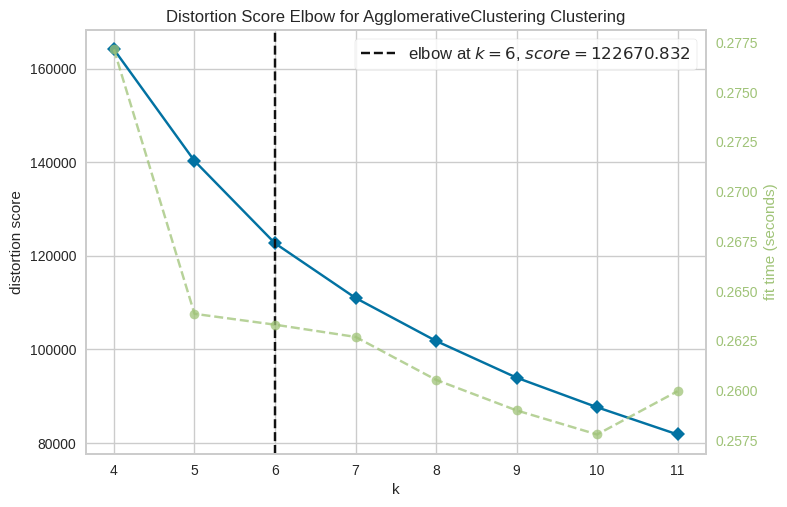

In [94]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(4,12))

visualizer.fit(mars_reduced_samples)  # Fit the data to the visualizer
visualizer.show()   
plt.show()
#compliqué de trouver le nombre de cluster avec ses methodes car on ne visualise pas bien le coude ici

##### <span style="color:purple">**Todo:** Visualize the dendrogram associated to the reduced data set.</span>

In [ ]:
### TO BE COMPLETED ### 

[...]

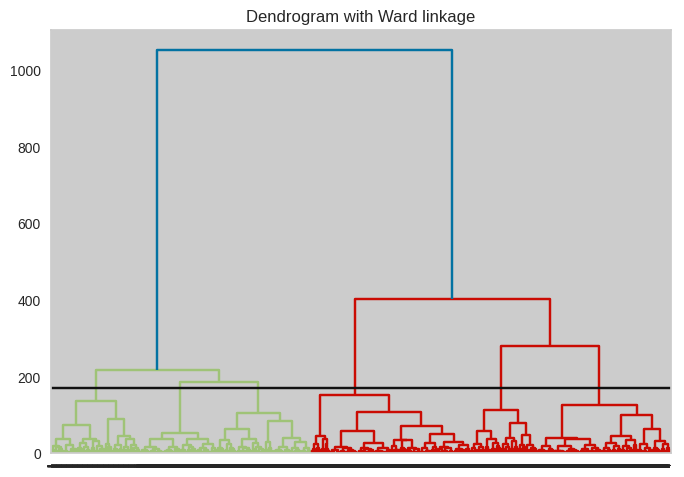

In [96]:
# %load solutions/ac/ac_dendrogram.py
K = 6

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters = ac.fit(mars_reduced_samples)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

#On coupe à 6 clusters : on devrait couper à 2 clusters : + gde diff de hauteur

##### <span style="color:purple">**Todo:** Evaluate the effect of the choice of the linkage function.</span>

You may represent the dendrogram for each type of linkage. This can be done by further reducing the size of the dataset.

In [97]:
mars_reduced2_samples = mars_reduced[::100]

print("mars data full sample size:", mars_reduced.shape)
print("mars data sub-sample size :", mars_reduced2_samples.shape)

mars data full sample size: (38400, 3)
mars data sub-sample size : (384, 3)


In [98]:
### TO BE COMPLETED ### 

[...]

[Ellipsis]

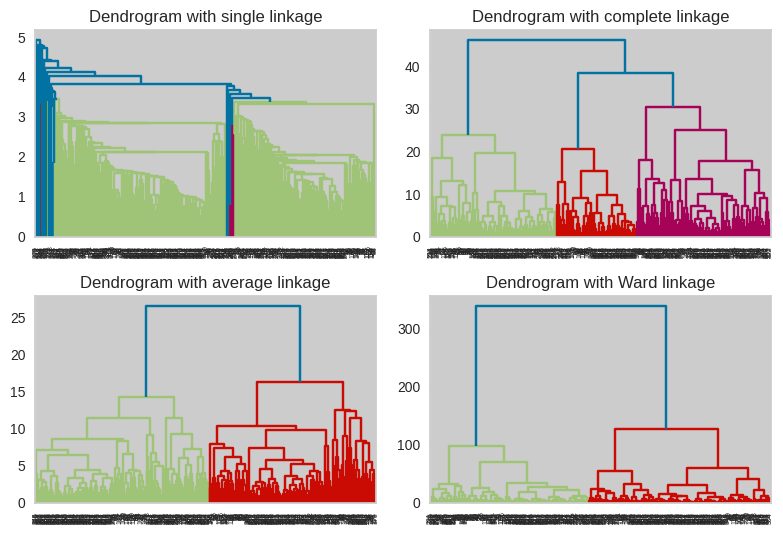

In [101]:
# %load solutions/ac/ac_linkage.py
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(mars_reduced2_samples, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(mars_reduced2_samples, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(mars_reduced2_samples, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(mars_reduced2_samples, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

#### Visualize agglomerative clustering

##### <span style="color:purple">**Todo:** Display the reduced data set, colored according to the classes found by CAH.</span>

You may plot the scatterplot composed of the first two components of this reduced data set. You can choose to work either on the subsample defined at the beginning of this section, or on the complete data set.

In [ ]:
### TO BE COMPLETED ### 

[...]

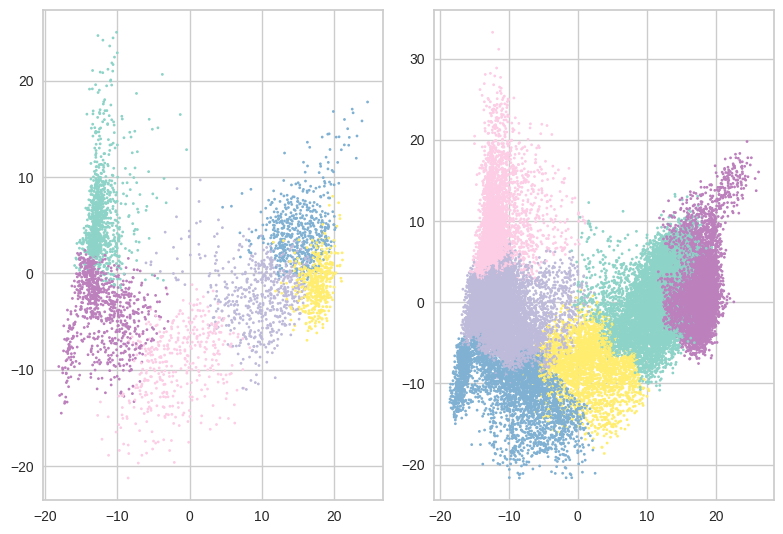

In [103]:
# %load solutions/ac/ac_acp.py
K = 6

cmap = plt.get_cmap('Set3', K)

# -- #

ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(mars_reduced_samples)

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(mars_reduced)

# -- #

# On the sub-sample
plt.subplot(1,2,1)
plt.scatter(mars_reduced_samples[:,0], mars_reduced_samples[:,1], c=clusters_ac_ss, s=1, linewidths=1, cmap=cmap)

# On the complete dataset
plt.subplot(1,2,2)
plt.scatter(mars_reduced[:,0], mars_reduced[:,1], c=clusters_ac, s=1, linewidths=1, cmap=cmap)

plt.tight_layout()
plt.show()

**Interpretation**: As before, the classes may not have the same label, hence the color swap.

##### <span style="color:purple">**Todo:** Represent the geological composition of Mars for 6 classes, using the CAH algorithm.</span>

Plot side by side the scatterplot of the first two components of the reduced data set, and the reconstructed image of Mars. Color these two graphs in a consistent manner.

In [ ]:
### TO BE COMPLETED ### 

[...]

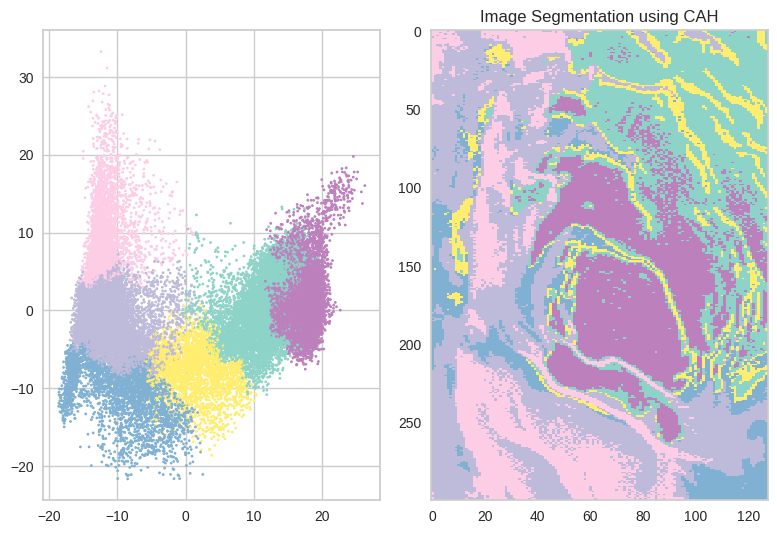

In [105]:
# %load solutions/ac/ac_img.py
K = 6
n_pixel_x = 300
n_pixel_y = 128

cmap = plt.get_cmap('Set3', K)
# clusters_ac = ac.fit_predict(mars_reduced)

plt.subplot(1,2,1)
plt.scatter(mars_reduced[:,0], mars_reduced[:,1], c=clusters_ac, s=1, linewidths=1, cmap=cmap)
plt.grid(True)

plt.subplot(1,2,2)
mars_image_ac = clusters_ac.reshape((n_pixel_x, n_pixel_y))
plt.imshow(mars_image_ac, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("Image Segmentation using CAH")
plt.grid(False)

plt.tight_layout()
plt.show()

## Gaussian Mixture Models

In [106]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 

##### <span style="color:purple">**Todo:** Represent the geological composition of Mars for 6 classes, using the GMM algorithm.</span>

Plot side by side the scatterplot of the first two components of the reduced data set, and the reconstructed image of Mars. Color these two graphs in a consistent manner.

In [107]:
### TO BE COMPLETED ### 

[...]

[Ellipsis]

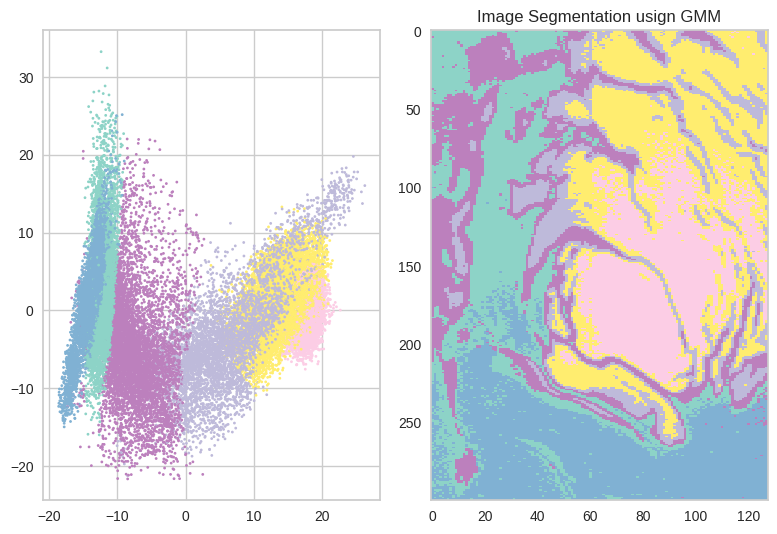

In [115]:
# %load solutions/gmm/gmm_img.py
K = 6
n_pixel_x = 300
n_pixel_y = 128
cmap = plt.get_cmap('Set3', K)

# --- #

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(mars_reduced)

# --- #

plt.subplot(1,2,1)
plt.scatter(mars_reduced[:,0], mars_reduced[:,1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
plt.grid(True)

plt.subplot(1,2,2)
mars_image_gmm = clusters_gmm.reshape((n_pixel_x, n_pixel_y))
plt.imshow(mars_image_gmm, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("Image Segmentation usign GMM")
plt.grid(False)

plt.tight_layout()
plt.show()

##### <span style="color:purple">**Question:** Is the BIC adapted to select the right number of clusters in our problem?</span>

In [ ]:
### TO BE COMPLETED ### 

[...]

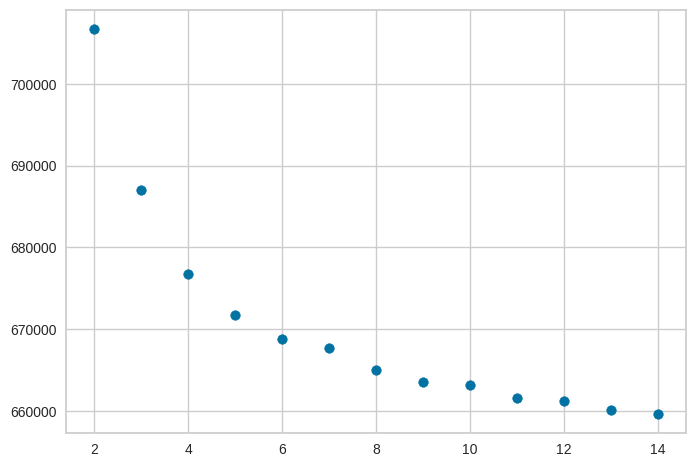

In [116]:
# %load solutions/gmm/gmm_bic.py
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(mars_reduced)
    bic.append(gmm.bic(mars_reduced))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()

#On veut le min et à terme il fait que décroitre : pas adapté car pas de grosse baisse entre 6 et 7 clusters
#d'après ce critère on devrait choisir 2 clusters mais d'après la littérature 6 clusters sont plus adaptés 
# le bic selectionne des modèles trop compliqués

##### <span style="color:purple">**Todo:** Propose an alternative method.</span>

You can for instance use the silhouette score.

In [ ]:
### TO BE COMPLETED ### 

[...]

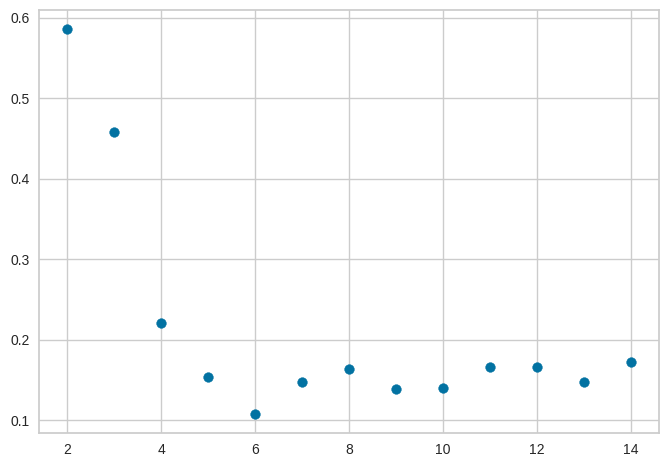

In [118]:
# %load solutions/gmm/gmm_silhouette.py
k_max = 15

silhouette = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    clusters_gmm = gmm.fit_predict(mars_reduced)
    silhouette.append( silhouette_score(mars_reduced, clusters_gmm, metric='euclidean') )
silhouette = np.array(silhouette)

plt.scatter(range(2, k_max), silhouette)
plt.show()

#On doit trouver le max : on devrait choisir 2 (mais on en prend 6 clusters)

## Comparison of clustering algorithms

The purpose of this last section is to compare the different results we obtained previously.

### Visualize Kmeans versus GMM components

In [119]:
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

##### <span style="color:purple">**Todo:** Write a function `plotKmeans` that draws circles around each of the clusters identified by the kmeans algorithm.</span>

To do this, complete the following function. The circles must be of the same color as the points that make up the corresponding cluster.

In [120]:
### TO BE COMPLETED ### 

def plotKmeans(kmeans, data, n_clusters=6):
    kmeans.fit(...)
    clusters_kmeans = ...

    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', ...)

    # plot the input data
    ax.scatter(...)
    
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radius = [cdist(data[clusters_kmeans == i], [center]).max() for i, center in enumerate(centers)]
    for i in range(...):
        ax.add_patch(plt.Circle(...))

In [122]:
# %load solutions/compare/plotKmeans.py
def plotKmeans(kmeans, data, n_clusters=6):
    kmeans.fit(data)
    clusters_kmeans = kmeans.predict(data)

    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)

    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_kmeans, s=1, linewidths=1, cmap=cmap)
    
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radius = [cdist(data[clusters_kmeans == i], [center]).max() for i, center in enumerate(centers)]
    for i in range(n_clusters):
        ax.add_patch(plt.Circle(centers[i], radius[i], fc=cmap.colors[i], alpha=0.3))

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


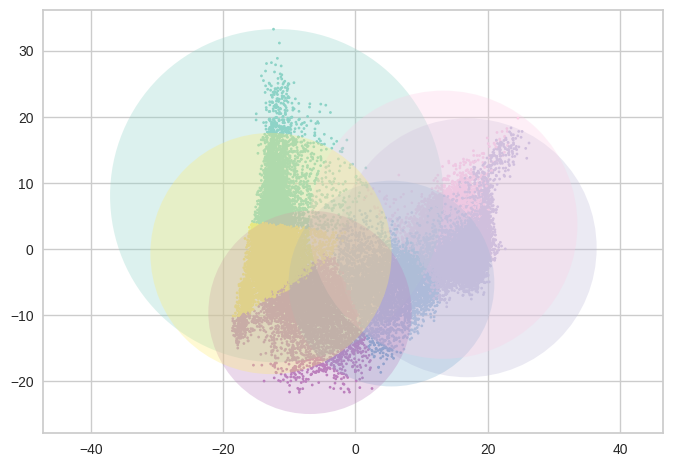

In [123]:
K = 6
kmeans = KMeans(n_clusters=K)

plotKmeans(kmeans, mars_reduced)

The following function allows to plot an ellipse of color `col`, of center `mean` and based on the `covariance` matrix.

In [124]:
def draw_ellipse(mean, covariance, alpha, ax, col='#CCCCCC'):
    """Draw an ellipse with a given position and covariance"""    
    # Convert covariance to principal axes
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    # Draw the Ellipse
    ax.add_patch(Ellipse(mean, 4*width, 4*height, angle=angle, alpha=alpha, fc=col))

##### <span style="color:purple">**Todo:** Write a function `plotGMM` that draws ellipses around each of the clusters identified by the GMM algorithm.</span>

You can freely use the previous function. The ellipses must be of the same color as the points that make up the corresponding cluster, and their opacity (`alpha`) must be related to the weight of the said cluster in the blending model.

In [125]:
### TO BE COMPLETED ### 

def plotGMM(gmm, data, n_clusters=6):
    [...]

In [127]:
# %load solutions/compare/plotGMM.py
def plotGMM(gmm, data, n_clusters=6):
    gmm.fit(data)
    clusters_gmm = gmm.predict(data)
    
    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)
    
    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
    
    # w_factor = 0.2 / gmm.weights_.max()
    for i in range(n_clusters):
        mean = gmm.means_[i,:2]
        covariance = gmm.covariances_[i,:2,:2]
        w = gmm.weights_[i]
        draw_ellipse(mean, covariance, w, ax, cmap.colors[i])

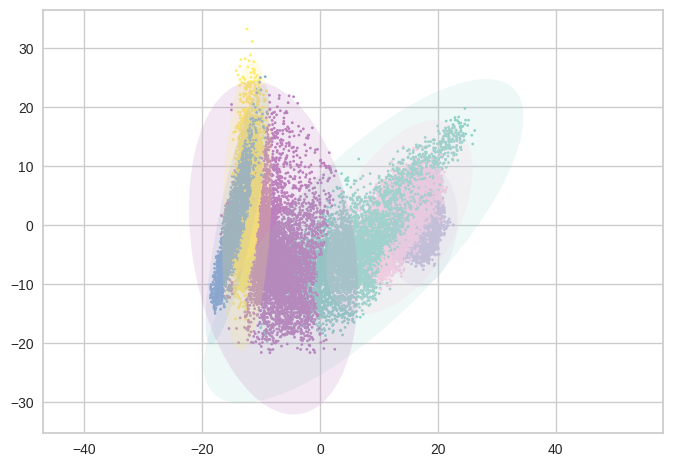

In [137]:
K = 6
gmm = GaussianMixture(n_components=K, init_params='kmeans')

plotGMM(gmm, mars_reduced)

#### Re-indexing of clusters for better visualization

As before, the clusters (moreover found by two different algorithms!) have no chance to match.

In [138]:
K = 6
n_pixel_x = 300
n_pixel_y = 128

kmeans = KMeans(n_clusters=K, n_init=10)
clusters_kmeans = kmeans.fit_predict(mars_reduced)

gmm = GaussianMixture(n_components=K, n_init=10, init_params='kmeans')
clusters_gmm = gmm.fit_predict(mars_reduced)

##### <span style="color:purple">**Todo:** Using a previously defined function, match the classes obtained by kmeans and not GMM.</span>

What do you notice?

In [ ]:
### TO BE COMPLETED ### 

[...]

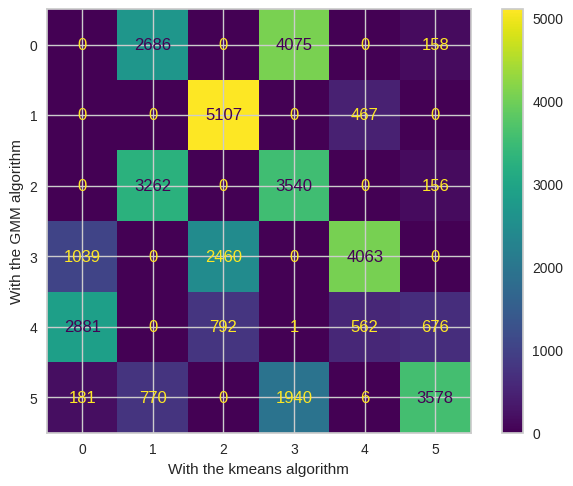


Classes size: [2881 3262 5107 4075 4063 3578]
Class (in the classif1 numbering): [4 2 1 0 3 5]



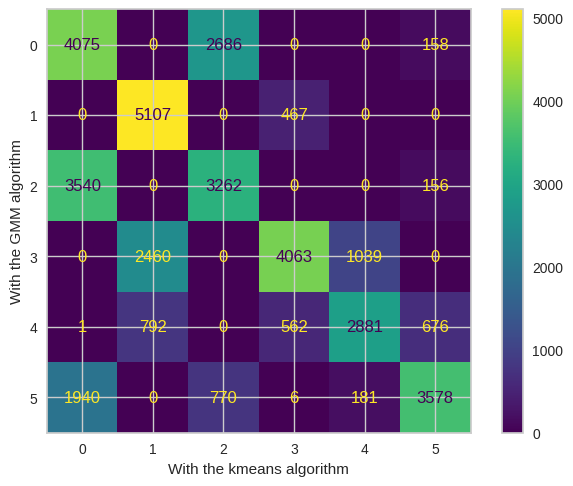

In [139]:
# %load solutions/compare/kmeans_vs_gmm.py
ConfusionMatrixDisplay(confusion_matrix(clusters_gmm, clusters_kmeans)).plot()

plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')
plt.show()

# --- #

cm, clusters_kmeans_sorted = matchClasses(clusters_gmm, clusters_kmeans)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')
plt.show()

# la matrice de confusion réorganisée est pas très belle : on a deux classifications différentes (on a pas que des grosses valeurs sur la diagonale) : le cluster 0 de kmean a été partagé en 2 sur gmm 

##### <span style="color:purple">**Todo:** Visually compare the kmeans and GMM segmentation. </span>

Visualize side by side the partition obtained by kmeans (re-oroded), the one obtained by GMM and an image highlighting the differently classified pixels.

In [ ]:
### TO BE COMPLETED ### 

[...]

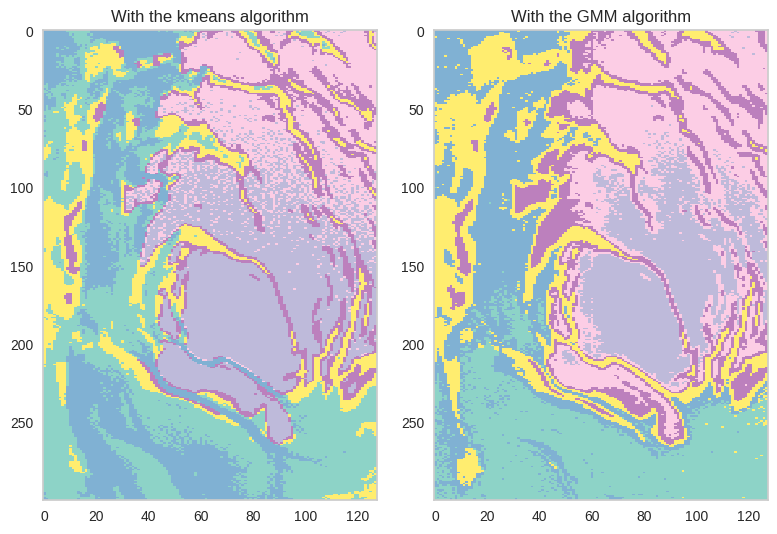

Ratio of differently classified points: 0.4019270833333333
Nb of pixels differently classified: 15434


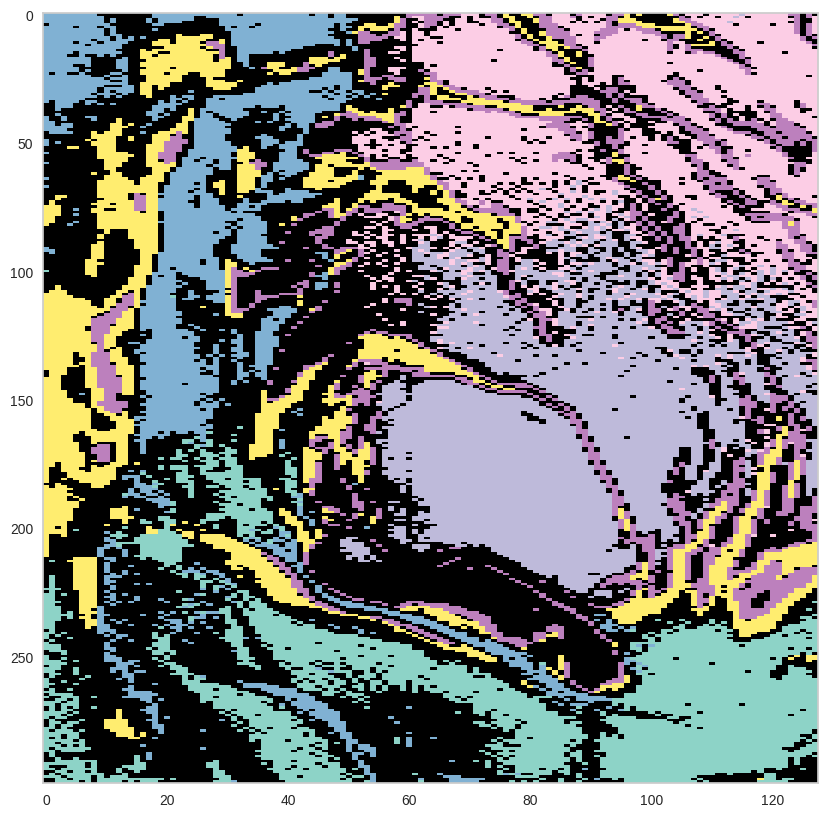

In [140]:
# %load solutions/compare/kmeans_vs_gmm_img.py
K = 6
n_pixel_x = 300
n_pixel_y = 128
cmap = plt.get_cmap('Set3', K)

# --- #

mars_image_kmeans = clusters_kmeans_sorted.reshape((n_pixel_x, n_pixel_y))
mars_image_gmm = clusters_gmm.reshape((n_pixel_x, n_pixel_y))

# --- #

plt.subplot(1,2,1)
plt.imshow(mars_image_kmeans, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("With the kmeans algorithm")
plt.grid(False)

plt.subplot(1,2,2)
plt.imshow(mars_image_gmm, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("With the GMM algorithm")
plt.grid(False)

plt.tight_layout()
plt.show()

diffPlot(clusters_gmm, clusters_kmeans_sorted)

## Comparison to experts ground truth



##### <span style="color:purple">**Todo:** Load the experts ground truth.</span>

Load them as a `numpy`-array of size (38400,)

In [ ]:
### TO BE COMPLETED ### 

[...]

In [142]:
# %load solutions/compare/expert_data.py
n_pixel_x = 300
n_pixel_y = 128

clusters_expert = pd.read_csv("data/mask.csv").to_numpy()
clusters_expert = clusters_expert.reshape(n_pixel_x * n_pixel_y)

##### <span style="color:purple">**Question:** Do the ground truth classes seem balanced to you?</span>


In [ ]:
### TO BE COMPLETED ### 

[...]

In [144]:
# %load solutions/compare/expert_balance.py
for i in range(10):
    print(i, ':', np.sum(clusters_expert==i) )
    
#On a 7 clusters mais le 7ème a que 7 données dedans donc on considère qu'il y en a que 6 : on le merge avec un autre cluster

0 : 1897
1 : 16611
2 : 2910
3 : 1193
4 : 14704
5 : 95
6 : 983
7 : 7
8 : 0
9 : 0


In [146]:
# %load solutions/compare/expert_merge.py
# Class 7 is far too low to be considered relevant. 
# -> We will treat it as outliers, and merge it with the Class 5. 
# Thus the ground truth consists effectively of 6 classes.

clusters_expert[clusters_expert==7] = 5

for i in range(10):
    print(i, ':', np.sum(clusters_expert==i) )

0 : 1897
1 : 16611
2 : 2910
3 : 1193
4 : 14704
5 : 102
6 : 983
7 : 0
8 : 0
9 : 0


##### <span style="color:purple">**Todo:** View the ground truth obtained by the Mars experts.</span>

In [ ]:
### TO BE COMPLETED ### 

[...]

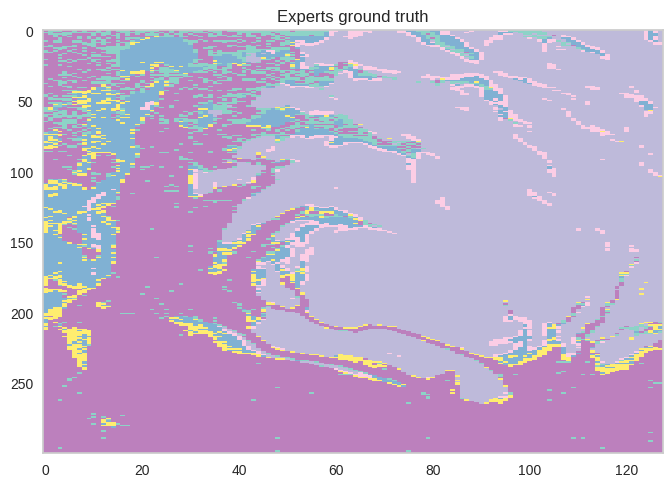

In [148]:
# %load solutions/compare/expert_img.py
K = 6
n_pixel_x = 300
n_pixel_y = 128
cmap = plt.get_cmap('Set3', K)

mars_image_expert = clusters_expert.reshape((n_pixel_x, n_pixel_y))

plt.imshow(mars_image_expert, interpolation="nearest", aspect="auto", cmap=cmap)

plt.title("Experts ground truth")
plt.grid(False)
plt.show()

##### <span style="color:purple">**Todo:** Visually compare the ground truth to previously obtained classifications.</span>

What do you think about it?

In [ ]:
### TO BE COMPLETED ### 

[...]

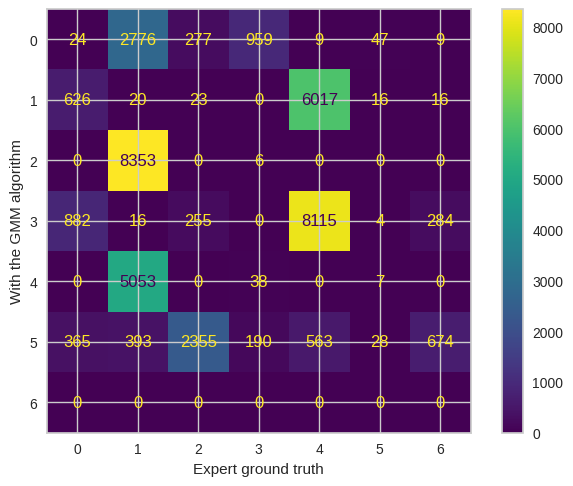


Classes size: [2776 6017 8353 8115 5053 2355    0]
Class (in the classif1 numbering): [1 4 1 4 1 2 0]



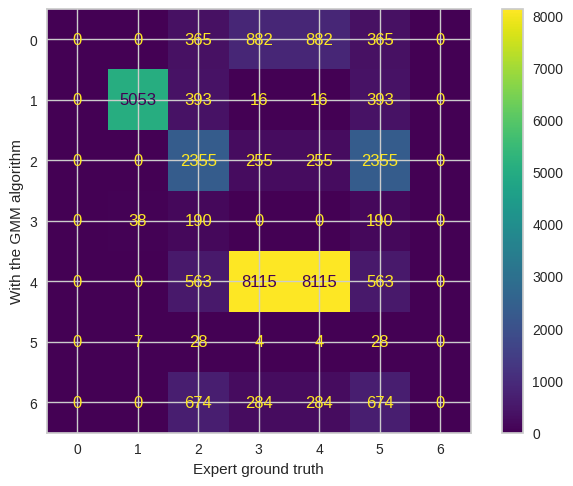

In [150]:
# %load solutions/compare/compare_cm.py
ConfusionMatrixDisplay(confusion_matrix(clusters_kmeans, clusters_expert)).plot()
plt.xlabel('Expert ground truth')
plt.ylabel('With the GMM algorithm')
plt.show()

# --- #

cm, clusters_kmeans_sorted = matchClasses(clusters_expert, clusters_kmeans)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('Expert ground truth')
plt.ylabel('With the GMM algorithm')
plt.show()


Classes size: [2776 6017 8353 8115 5053 2355    0]
Class (in the classif1 numbering): [1 4 1 4 1 2 0]


Classes size: [6893 5574 6172 7450 3273 2347    0]
Class (in the classif1 numbering): [4 1 4 1 1 2 0]


Classes size: [7788 8115 1356 5369 7441 1178    0]
Class (in the classif1 numbering): [1 4 2 4 1 1 0]



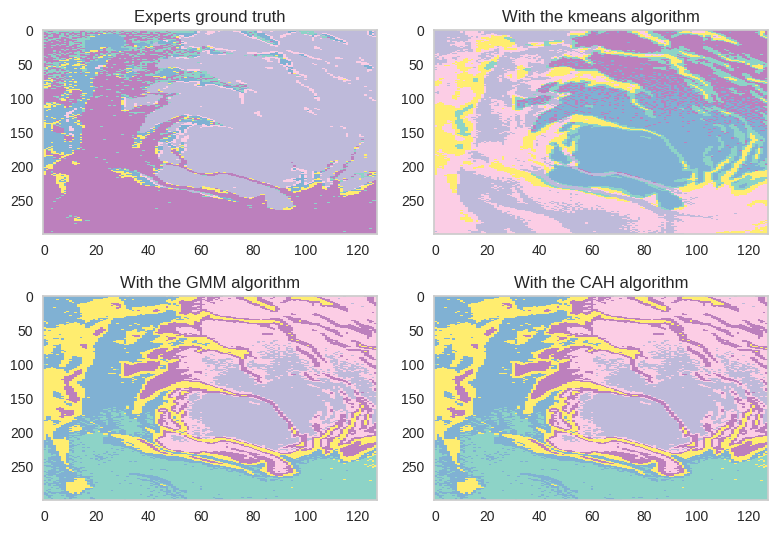

In [152]:
# %load solutions/compare/compare_img.py
K = 6
n_pixel_x = 300
n_pixel_y = 128
cmap = plt.get_cmap('Set3', K)

# --- #

cm, clusters_kmeans_sorted = matchClasses(clusters_expert, clusters_kmeans)
cm, clusters_gmm_sorted = matchClasses(clusters_expert, clusters_gmm)
cm, clusters_ac_sorted = matchClasses(clusters_expert, clusters_ac)

mars_image_expert = clusters_expert.reshape((n_pixel_x, n_pixel_y))

sort = False
if sort:
    mars_image_kmeans = clusters_kmeans_sorted.reshape((n_pixel_x, n_pixel_y))
    mars_image_gmm = clusters_gmm_sorted.reshape((n_pixel_x, n_pixel_y))
    mars_image_ac = clusters_ac_sorted.reshape((n_pixel_x, n_pixel_y))
else:
    mars_image_kmeans = clusters_kmeans.reshape((n_pixel_x, n_pixel_y))
    mars_image_gmm = clusters_gmm.reshape((n_pixel_x, n_pixel_y))
    mars_image_ac = clusters_ac.reshape((n_pixel_x, n_pixel_y))

# -- #

plt.subplot(2,2,1)
plt.imshow(mars_image_expert, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("Experts ground truth")
plt.grid(False)

plt.subplot(2,2,2)
plt.imshow(mars_image_kmeans, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("With the kmeans algorithm")
plt.grid(False)

plt.subplot(2,2,3)
plt.imshow(mars_image_gmm, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("With the GMM algorithm")
plt.grid(False)

plt.subplot(2,2,4)
plt.imshow(mars_image_gmm, interpolation="nearest", aspect="auto", cmap=cmap)
plt.title("With the CAH algorithm")
plt.grid(False)

plt.tight_layout()
plt.show()

#On aurait du ecouter les indicateurs et prendre que 2 clusters : sauf que on est en non supervisé : on ne connait pas les classes des données, mieux vaut prendre les mesures sur le terrain

**Note:** [Bouveyron (2017)](https://hal.science/hal-01264844) uses the `R` package `HDClassive` to estimate the parameters of Gaussian mixture models in connection with a dimension reduction. The resulting image is still very different from the previous ones. It is difficult to know if an automatic segmentation is more appropriate than another to find what could be a "good" geological map of Mars. This underlines all the difficulties of making informed choices in an unsupervised context.

##### <span style="color:purple">**Todo:** Quantitatively compare the ground truth to previously obtained classifications.</span>

You could use the [Fowlkes-Mallows](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html) score and the [mutual information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) score for instance.

In [ ]:
### TO BE COMPLETED ### 

[...]

In [154]:
# %load solutions/compare/compare_score.py
print("-- Results for K-means --")
print("Fowlkes Mallows score: %f" % fowlkes_mallows_score(clusters_kmeans, clusters_expert))
print("Mutual Information   : %f" % normalized_mutual_info_score(clusters_kmeans, clusters_expert))

print()

print("-- Results for CAH --")
print("Fowlkes Mallows score: %f" % fowlkes_mallows_score(clusters_ac, clusters_expert))
print("Mutual Information   : %f" % normalized_mutual_info_score(clusters_ac, clusters_expert))

print()

print("-- Results for GMM --")
print("Fowlkes Mallows score: %f" % fowlkes_mallows_score(clusters_gmm, clusters_expert))
print("Mutual Information   : %f" % normalized_mutual_info_score(clusters_gmm, clusters_expert))

#Score moyen donc les classifications des experts avec chaque méthode ne correspond pas

-- Results for K-means --
Fowlkes Mallows score: 0.578670
Mutual Information   : 0.529776

-- Results for CAH --
Fowlkes Mallows score: 0.569782
Mutual Information   : 0.503732

-- Results for GMM --
Fowlkes Mallows score: 0.548026
Mutual Information   : 0.540831


However, there is some randomness in both versions of the algorithms (Random initialization for $k$-means, random subset of data for agglomerative clustering). To obtain more relevant results, several runs should be conducted and averaged for $k$-means and all the data should be used for agglomerative clustering.

##### <span style="color:purple">**Question:** Does this hazard induce a strong variability in the results?</span>

Perform several runs of the kmeans algorithm and compare the subsequent error scores. 

In [ ]:
### TO BE COMPLETED ### 

[...]

In [158]:
# %load solutions/compare/compare_nruns.py
K = 6
n_run = 10

# --- #

fm = []
nmi = []
for i in range(n_run):
    clusters = KMeans(K, init='k-means++', n_init='auto').fit_predict(mars_reduced)
    fm.append(fowlkes_mallows_score(clusters, clusters_expert))
    nmi.append(normalized_mutual_info_score(clusters, clusters_expert))
fm = np.array(fm)
nmi = np.array(nmi)

# --- #

print("Results for K-means, applied on first three dimensions of PCA, over %i runs:" % n_run)
print(u"Fowlkes Mallows   : %f \u00B1 %f" % (fm.mean(), fm.std()))
print(u"Mutual Information: %f \u00B1 %f" % (nmi.mean(), nmi.std()))

Results for K-means, applied on first three dimensions of PCA, over 10 runs:
Fowlkes Mallows   : 0.575357 ± 0.002968
Mutual Information: 0.530063 ± 0.001750
